# Customer Churn Prediction Analysis Using Supervised Learning Approach

- Using Normalized Data
- SeleckKBEST Feature Selection Technique 
- Using SMOTE Technique to handle class imbalance
- Models: Logistic Regression, Random Forest and SVM Model
- Using ROC AUC Curve to evaluate the model's performance

## Define the Problem: 
First we will define the objectives of this analysis and the questions you want to answer using the data and understand the context and purpose of the analysis.
- The analysis is to develop predictive model to forecast churn in Fashion businesses.

## Importing Necessary Liabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as imbpipeline

The data was scraped from a successful online Customer-to-Customer (C2C) fashion store in 2020 with over 9M registered users. The store was first launched in Europe around 2009 then expanded worldwide.

Only registered users are included. "Visitors" cannot purchase an article but can view the catalog.
The Datasets concerns users of a C2C website. The Users are both the suppliers (by uploading their products) AND the customers (by purchasing other user's articles). 

Each row in the table represents a single user's statistics. Profiles have been anonymised for privacy concerns.

## Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\mango\Desktop\Fashion Customer Churn Dataset.csv")

To focus on the European Union (EU) market, the code below filters the datasets to include only customers from EU countries.

In [3]:
european_countries = [
    'Albanie', 'Allemagne', 'Andorre', 'Autriche', 'Belgique', 'Biélorussie', 'Bosnie-Herzégovine', 'Bulgarie', 
    'Chypre', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Géorgie', 'Grèce', 
    'Hongrie', 'Islande', 'Irlande', 'Italie', 'Kazakhstan', 'Kosovo', 'Lettonie', 'Liechtenstein', 
    'Lituanie', 'Luxembourg', 'Malte', 'Moldavie', 'Monaco', 'Monténégro', 'Norvège', 'Pays-Bas', 
    'Pologne', 'Portugal', 'République tchèque', 'Roumanie', 'Royaume-Uni', 'Russie', 'Saint-Marin', 
    'Serbie', 'Slovaquie', 'Slovénie', 'Suède', 'Suisse', 'Ukraine', 'Vatican'
]

# Filter the dataset for European countries
df = df[df['country'].isin(european_countries)]

In [4]:
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,mrs,True,False,True,False,11,3196,106.53,8.88,de
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,miss,True,True,False,False,11,3198,106.60,8.88,se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98904,3957915554,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,708,3204,106.80,8.90,gb
98906,3957784482,user,Irlande,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,708,3204,106.80,8.90,ie
98909,3957587874,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,3957522338,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be


In [5]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,mrs,True,False,True,False,11,3196,106.53,8.88,de
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,miss,True,True,False,False,11,3198,106.60,8.88,se


In [6]:
df.tail

<bound method NDFrame.tail of        identifierHash  type      country language  socialNbFollowers  \
0          1920991140  user  Royaume-Uni       en                147   
1          1920925604  user       Monaco       en                167   
2          1920860068  user       France       fr                137   
5          1920597924  user    Allemagne       de                130   
6          1920532388  user        Suède       en                121   
...               ...   ...          ...      ...                ...   
98904      3957915554  user  Royaume-Uni       en                  3   
98906      3957784482  user      Irlande       en                  3   
98909      3957587874  user       France       fr                  3   
98910      3957522338  user     Belgique       en                  3   
98911      3957456802  user       Italie       it                  3   

       socialNbFollows  socialProductsLiked  productsListed  productsSold  \
0                   10      

Currently, the dataset contains too many users who are inactive (users that only seem to have signed up to try the site out, maybe browse through and do nothing else). The website actually strongly incitate users to sign up (otherwise they cannot browse the site), which may be a reason for such a proportion of passive users.

Since the website is a C2C platform whose business model is to earn money when products are sold, I will define and call active users whose activity on the platform directly participates toward that end, i.e. prospective buyers and prospective sellers.

Active users are those that are either:

prospective buyers: those interacted with products of others with a like/wishlist/purchase

prospective sellers: those having at least one product for sale.

The code below will filter out inactive users and categorise active users based on their interaction with the platform, and also provide a clear breakdown of prospective buyers, prospective sellers, and successful sellers.

In [7]:
def helper_has_any_field_greater_than(df, columns, target):
    return df[columns].max(axis=1) > target


data = df[helper_has_any_field_greater_than(df, ['socialProductsLiked', 'productsListed', 'productsSold',
       'productsPassRate', 'productsWished', 'productsBought'], 0)]
data.dataframeName = "Active Users"


### BUYING/SELLING BEHAVIOUR ###

### Buyers
buyers_df = df[df.productsBought > 0]
#buyers_df.productsBought.describe()
buyers_df.dataframeName = "Buyers"

### Prospecting Sellers (has sold a product or is still trying do his/her first sale)
sellers_df = df[(df.productsListed > 0) | (df.productsSold > 0)]
sellers_df.dataframeName = "Prospecting Sellers"

### Successful sellers (at least 1 product sold)
successful_sellers_df = df[df.productsSold > 0]
successful_sellers_df.dataframeName = "Successful sellers"



### RESULTS / INFOS
print(f"""Out of the {df.shape[0]} users of the dataset sample, there are:""")
print()
print(f"""- {data.shape[0]} active users ({100*data.shape[0]/df.shape[0]:.3}%). Among these prospective buyers and sellers""")

print(f"""  - {data.shape[0] - sellers_df.shape[0]} are prospective buyers""")
print(f"""    among which {buyers_df.shape[0]} people actually bought products (at least 1)""")
print(f"""  - {sellers_df.shape[0]} are prospective sellers""")
print(f"""    among which {successful_sellers_df.shape[0]} are successful sellers (>= 1 product successfully sold)""")
print()
print("\nNote that among the above number of sellers, some may act as buyers and vice-versa")

Out of the 68943 users of the dataset sample, there are:

- 15904 active users (23.1%). Among these prospective buyers and sellers
  - 13466 are prospective buyers
    among which 4200 people actually bought products (at least 1)
  - 2438 are prospective sellers
    among which 1855 are successful sellers (>= 1 product successfully sold)


Note that among the above number of sellers, some may act as buyers and vice-versa


In [8]:
data

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,mrs,True,False,True,False,11,3196,106.53,8.88,de
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,miss,True,True,False,False,11,3198,106.60,8.88,se
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98884,3959226274,user,Allemagne,de,3,8,1,0,0,0.0,...,mrs,True,False,True,True,176,3204,106.80,8.90,de
98889,3958898594,user,France,fr,3,8,1,0,0,0.0,...,mrs,False,False,False,True,477,3204,106.80,8.90,fr
98896,3958439842,user,Allemagne,en,3,8,10,0,0,0.0,...,mrs,True,False,True,True,15,3204,106.80,8.90,de
98898,3958308770,user,France,fr,3,8,5,0,0,0.0,...,mrs,False,False,False,True,192,3204,106.80,8.90,fr


## Data Transformation

In [9]:
# Calculate quartiles and percentiles
quartiles = data['daysSinceLastLogin'].quantile([0.25, 0.5, 0.75])
percentiles = data['daysSinceLastLogin'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

print("Quartiles:")
print(quartiles)
print("\nPercentiles:")
print(percentiles)


Quartiles:
0.25     66.0
0.50    359.0
0.75    662.0
Name: daysSinceLastLogin, dtype: float64

Percentiles:
0.10     15.0
0.25     66.0
0.50    359.0
0.75    662.0
0.90    699.0
Name: daysSinceLastLogin, dtype: float64


The code below creates a new column churn, 1 represents Non-Churn users, and 0 represents churners. Based on the specified threshold of 180 days
The Threshold of 180 days was determined based on Assumption, A threshold like 180 days helps identify churners sooner, allowing for intervetion with targeted measuress to win them back.This allows for enough time to implement re-engagement strategies.

In [10]:
data['churn'] = pd.cut(x=data['daysSinceLastLogin'], bins=[0, 180, 710], 
                     labels=['no', 'yes'])

C:\Users\mango\AppData\Local\Temp\ipykernel_18316\3321205102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['churn'] = pd.cut(x=data['daysSinceLastLogin'], bins=[0, 180, 710],


In [11]:
data.dtypes

identifierHash            int64
type                     object
country                  object
language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityGenderId          int64
civilityTitle            object
hasAnyApp                  bool
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniority                 int64
seniorityAsMonths       float64
seniorityAsYears        float64
countryCode              object
churn                  category
dtype: object

### 

## Data Cleaning and Preprocessing

In this section we will;
- Handle missing values: Identify and deal with missing data by imputation or removal.
- Remove duplicates (if any): Eliminate duplicate records if present in the dataset (if any)
- Standardize data formats: Ensure consistency in data formats and units.
- Feature engineering: Create new features or transform existing ones to better represent the data and improve model performance.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15904 entries, 0 to 98901
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   identifierHash       15904 non-null  int64   
 1   type                 15904 non-null  object  
 2   country              15904 non-null  object  
 3   language             15904 non-null  object  
 4   socialNbFollowers    15904 non-null  int64   
 5   socialNbFollows      15904 non-null  int64   
 6   socialProductsLiked  15904 non-null  int64   
 7   productsListed       15904 non-null  int64   
 8   productsSold         15904 non-null  int64   
 9   productsPassRate     15904 non-null  float64 
 10  productsWished       15904 non-null  int64   
 11  productsBought       15904 non-null  int64   
 12  gender               15904 non-null  object  
 13  civilityGenderId     15904 non-null  int64   
 14  civilityTitle        15904 non-null  object  
 15  hasAnyApp          

In [13]:
data.size

397600

In [14]:
data.nunique()

identifierHash         15904
type                       1
country                   40
language                   5
socialNbFollowers         85
socialNbFollows           77
socialProductsLiked      375
productsListed            62
productsSold              70
productsPassRate          70
productsWished           253
productsBought            61
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       699
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode               40
churn                      2
dtype: int64

In [15]:
data.dtypes

identifierHash            int64
type                     object
country                  object
language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityGenderId          int64
civilityTitle            object
hasAnyApp                  bool
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniority                 int64
seniorityAsMonths       float64
seniorityAsYears        float64
countryCode              object
churn                  category
dtype: object

In [16]:
data.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,churn
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,no
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,no
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,no
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,True,False,True,False,11,3196,106.53,8.88,de,no
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,True,True,False,False,11,3198,106.60,8.88,se,no


### Handling Missing Data

In [17]:
data.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
churn                  0
dtype: int64

In [18]:
data.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
churn                  0
dtype: int64

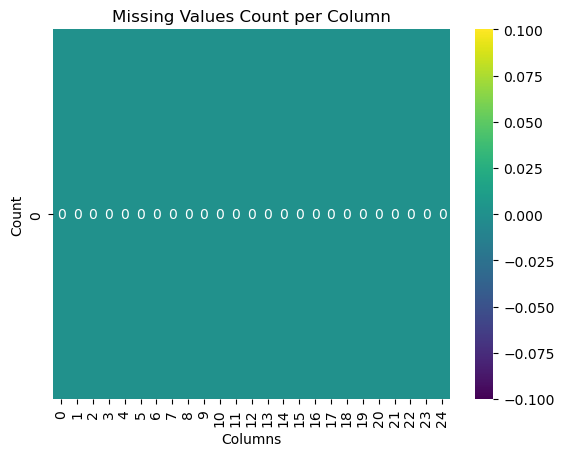

In [19]:
# Calculate the count of missing values in each column and convert it to a 2D array
missing_values_count = data.isna().sum().values.reshape(1, -1)

# Create a heatmap to visualize missing values count
sns.heatmap(missing_values_count, annot=True, cmap='viridis')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [20]:
data.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
churn                  0
dtype: int64

### Checking for Duplicates

In [21]:
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate Rows:")
    print(duplicate_rows)

No duplicate rows found.


In [22]:
#Descriptive Analysis
data.describe(include = 'all')

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,churn
count,1.590400e+04,15904,15904,15904,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,...,15904,15904,15904,15904,15904.000000,15904.000000,15904.000000,15904.000000,15904,15904
unique,NaN,1,40,5,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,NaN,NaN,NaN,NaN,40,2
top,NaN,user,France,en,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,True,NaN,NaN,NaN,NaN,fr,yes
freq,NaN,15904,4972,5926,NaN,NaN,NaN,NaN,NaN,NaN,...,8115,14609,9301,14604,NaN,NaN,NaN,NaN,4972,10203
mean,1.829659e+09,NaN,NaN,NaN,4.720573,10.410526,21.401094,0.506476,0.685048,4.606149,...,NaN,NaN,NaN,NaN,363.445674,3062.035526,102.067685,8.505605,NaN,NaN
std,1.116127e+09,NaN,NaN,NaN,9.048898,131.692651,444.783030,4.743985,4.854310,19.761240,...,NaN,NaN,NaN,NaN,271.578735,168.683713,5.622550,0.468898,NaN,NaN
min,5.241960e+05,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,11.000000,2852.000000,95.070000,7.920000,NaN,NaN
25%,1.051722e+09,NaN,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,66.000000,2857.000000,95.230000,7.940000,NaN,NaN
50%,1.698300e+09,NaN,NaN,NaN,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,359.000000,3196.000000,106.530000,8.880000,NaN,NaN
75%,2.374369e+09,NaN,NaN,NaN,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,662.000000,3201.000000,106.700000,8.890000,NaN,NaN


### 

## Exploratory Data Analysis (EDA):

- Here we will summarize and visualize the data using statistical measures, charts, and graphs.

In [23]:
data.dtypes

identifierHash            int64
type                     object
country                  object
language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityGenderId          int64
civilityTitle            object
hasAnyApp                  bool
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniority                 int64
seniorityAsMonths       float64
seniorityAsYears        float64
countryCode              object
churn                  category
dtype: object

### Visualizing Analysis

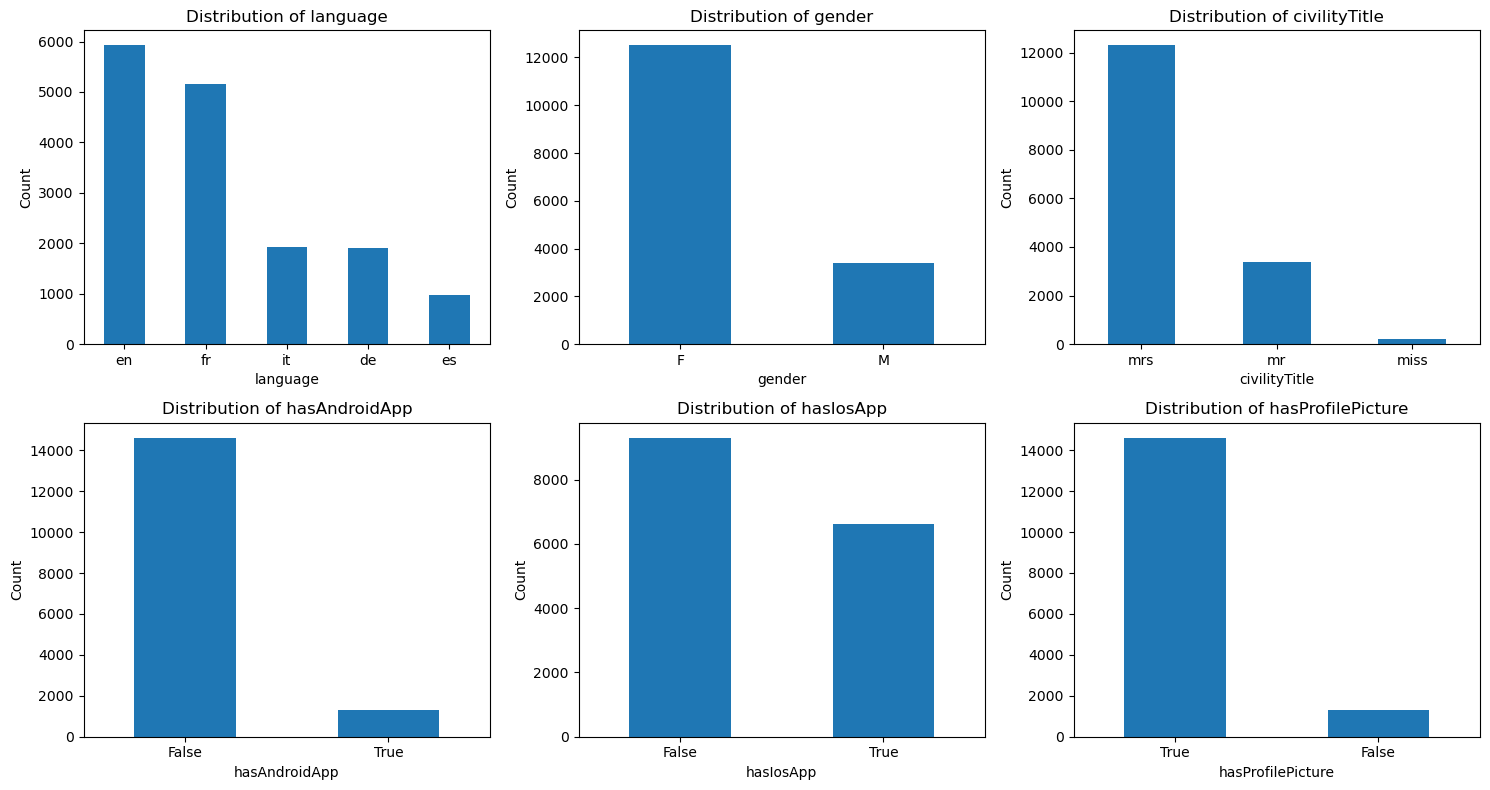

In [24]:
# List of categorical columns to plot
categorical_columns = ['language', 'gender', 'civilityTitle',
                       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture']
num_plots = len(categorical_columns)
num_cols = 3  # For instance, 2 columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))


# Flatten axes array if more than one row
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Plot bar charts for each categorical column
for i, item in enumerate(categorical_columns):
    ax = data[item].value_counts().plot(kind='bar', ax=axes[i], rot=0)
    ax.set_title(f'Distribution of {item}')
    ax.set_xlabel(item)
    ax.set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Overall Percentage and Count of Customers that Churned

In [25]:
#data['Churn'].value_counts()/100
percentage_counts = data['churn'].value_counts(normalize=True) * 100
print(percentage_counts)

yes    64.153672
no     35.846328
Name: churn, dtype: float64


In [26]:
 data['churn'].value_counts()

yes    10203
no      5701
Name: churn, dtype: int64

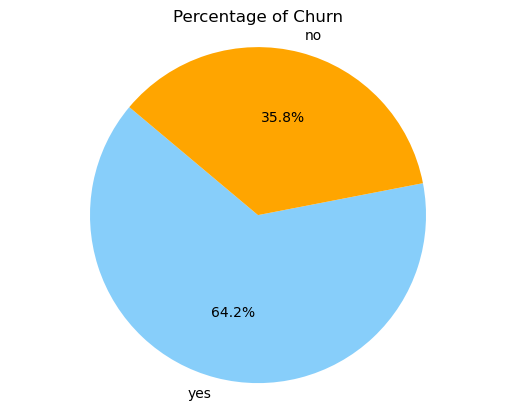

In [27]:
# Visualizing and Calculate percentage counts
percentage_counts = data['churn'].value_counts(normalize=True) * 100

# Plotting
labels = percentage_counts.index
sizes = percentage_counts.values
colors = ['lightskyblue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Churn')
plt.axis('equal')
plt.show()

#### We can see there is a significant class imbalance between customers that churned and customers that didn't churn. In the coming steps we will be using the SMOTE technique an oversampling method to address the class imbalance as this imbalance can affect the model's performance.

### 

### Churn by Gender

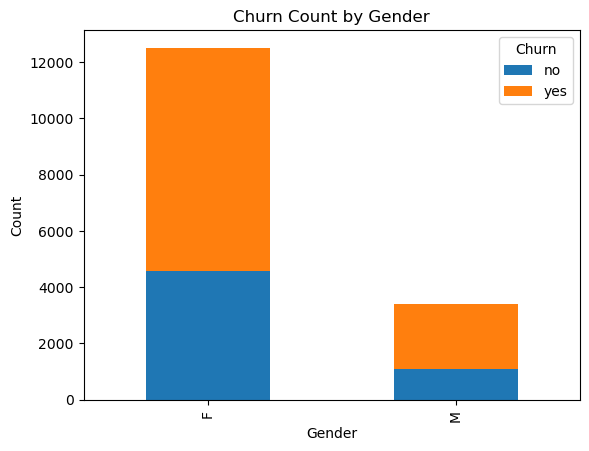

In [28]:
# Calculate the count of churned and non-churned customers by gender
churn_count = data.groupby(['gender', 'churn']).size().unstack()

custom_palette = {"Male": "lightskyblue", "Female": "orange"}

# Plotting
churn_count.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [29]:
# Calculate the count of churned and non-churned customers by gender
churn_count = data.groupby(['gender', 'churn']).size().unstack()

print(churn_count)

churn     no   yes
gender            
F       4592  7917
M       1109  2286


### figures are different for male and female. There are more female customer as agianst the male.

#### 

### Churn by seniorityAsYears

#### Customer that have been with the company for years that churned

In [30]:
churn_counts = data[data['churn'] == 'yes'].groupby('seniorityAsYears').size()
print(churn_counts)

seniorityAsYears
7.92     714
7.93    1626
7.94    1709
8.88    2298
8.89    2287
8.90    1569
dtype: int64


Most customers who churned had a seniority of around 8.88 and 8.89 years, representing the highest proportions of the churned population.
The seniority years of 7.93 and 7.94 also have significant churn counts, highlighting potential periods of increased risk for churn
This breakdown helps to identify patterns in customer tenure that correlate with higher churn rates, which can be valuable for targeted retention strategies..

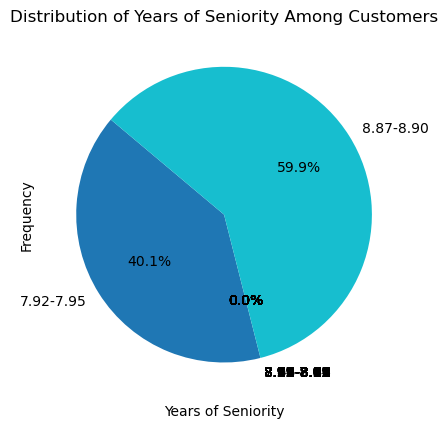

In [31]:
# Calculate the histogram
hist, bins = np.histogram(data['seniorityAsYears'], bins=30)

# Plotting the pie chart
plt.pie(hist, labels=[f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)], autopct='%1.1f%%', startangle=140)

# Adding labels and title
plt.xlabel('Years of Seniority')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Seniority Among Customers')

# Display the plot
plt.show()

In [32]:
data.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,churn
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,True,False,True,True,11,3196,106.53,8.88,gb,no
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,True,False,True,True,12,3204,106.80,8.90,mc,no
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,True,False,True,False,11,3203,106.77,8.90,fr,no
5,1920597924,user,Allemagne,de,130,12,1,47,123,91.0,...,True,False,True,False,11,3196,106.53,8.88,de,no
6,1920532388,user,Suède,en,121,0,1140,31,108,94.0,...,True,True,False,False,11,3198,106.60,8.88,se,no


#### Customer that are seniorityAsYears who did not Churn

In [33]:
churn_counts = data[data['churn'] == 'no'].groupby('seniorityAsYears').size()
print(churn_counts)

seniorityAsYears
7.92     455
7.93     959
7.94     910
8.88    1178
8.89    1276
8.90     923
dtype: int64


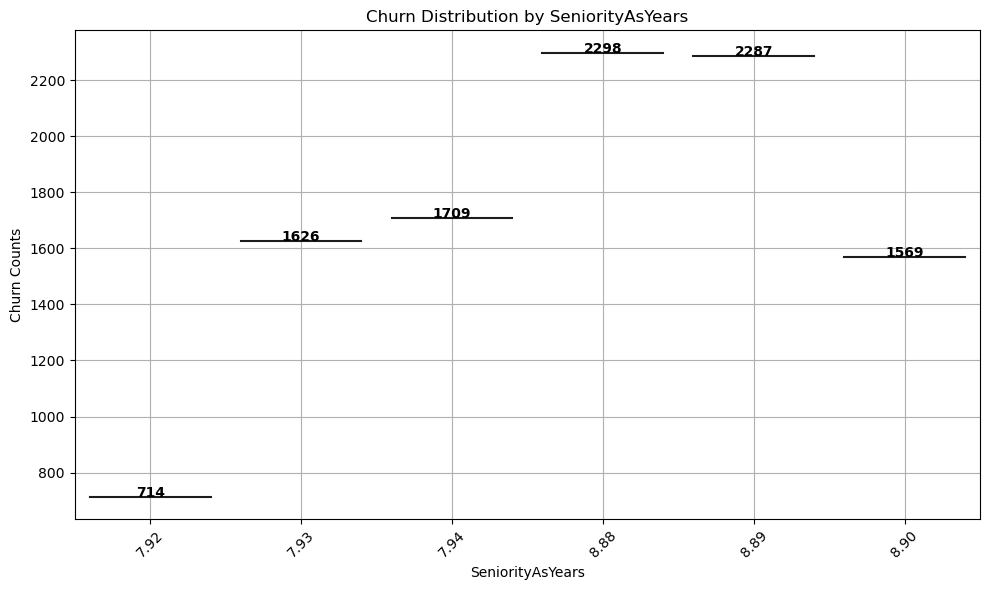

In [157]:
categories = ['7.92', '7.93', '7.94', '8.88', '8.89', '8.90']
churned = [714, 1626, 1709, 2298, 2287, 1569]

# Creating a dataframe for seaborn
data = pd.DataFrame({'SeniorityAsYears': categories, 'Churn Counts': churned})

# Plotting the violin plot with 'magma' palette
plt.figure(figsize=(10, 6))
sns.violinplot(x='SeniorityAsYears', y='Churn Counts', data=data, palette='magma')

# Adding data labels (annotations)
for index, row in data.iterrows():
    plt.text(index, row['Churn Counts'], row['Churn Counts'], 
             color='black', ha="center", fontsize=10, fontweight='bold')

# Adding labels and title
plt.title('Churn Distribution by SeniorityAsYears')
plt.xlabel('SeniorityAsYears')
plt.ylabel('Churn Counts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


### 

### Churn by civilityTitle

#### Customers who Churned by civilityTitle

In [35]:
churn_count = data[data['churn'] == 'yes'].groupby(['civilityTitle']).size()
print(churn_count)

civilityTitle
miss      98
mr      2286
mrs     7819
dtype: int64


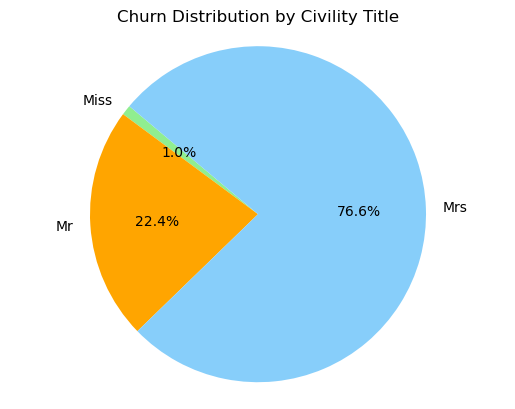

In [162]:
#Let's visualize it

# # Define custom colors
# colors = ['lightskyblue', 'orange']

# # Plotting
# plt.bar(churn_count.index, churn_count.values, color=colors)
# plt.xlabel('civilityTitle')
# plt.ylabel('Count of Churned Customers')
# plt.title('Different Customer by civilityTitle Who Churned')
# plt.xticks

import matplotlib.pyplot as plt

# Data for civilityTitle categories
churn_count = {'Miss': 98, 'Mr': 2286, 'Mrs': 7819}

# Define custom colors
colors = ['lightgreen', 'orange', 'lightskyblue']

# Plotting
plt.pie(churn_count.values(), labels=churn_count.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution by Civility Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


#### Customers by civilityTitle who did not Churned

In [37]:
churn_count = data[data['churn'] == 'no'].groupby(['civilityTitle']).size()
print(churn_count)

civilityTitle
miss     112
mr      1109
mrs     4480
dtype: int64


<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

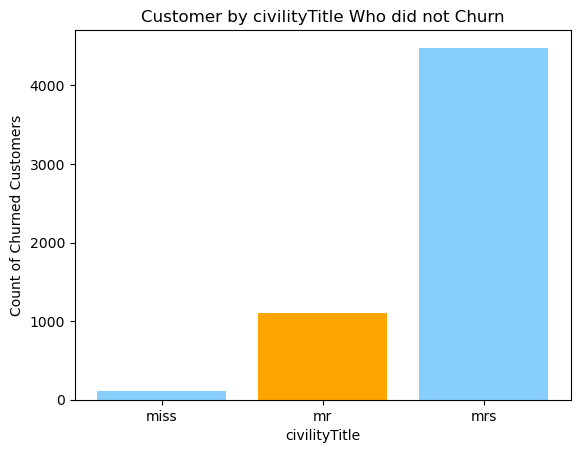

In [38]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting
plt.bar(churn_count.index, churn_count.values, color=colors)
plt.xlabel('civilityTitle')
plt.ylabel('Count of Churned Customers')
plt.title('Customer by civilityTitle Who did not Churn')
plt.xticks

#### 

### Churn by cutomers that has profile picture

#### Customers who hasProfilePicture who Churned

In [39]:
churn_counts = data[data['churn'] == 'yes'].groupby(['hasProfilePicture']).size()
print(churn_counts)

hasProfilePicture
False     464
True     9739
dtype: int64


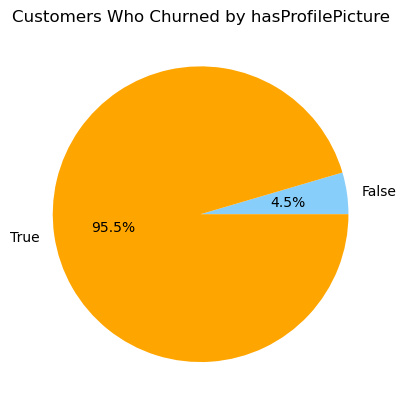

In [40]:
#Let's visualize it

# Define custom colors
colors = ['lightskyblue', 'orange']

# Plotting the pie chart
plt.pie(churn_counts.values, labels=churn_counts.index, colors=colors, autopct='%1.1f%%')

# Adding a title
plt.title('Customers Who Churned by hasProfilePicture')

# Display the plot
plt.show()


#### 

### Churn by Product Bought

#### Customers who bought product who Churned

In [41]:
# Define the bins and labels for productsBought
bins = [1, 11, 21, 31, 51, 406]
labels = ['1-10', '11-20', '21-30', '30-50', '50-405']

In [42]:
# Create a new column for the binned productsBought
data['productsBoughtRange'] = pd.cut(data['productsBought'], bins=bins, labels=labels, right=False, include_lowest=True)

C:\Users\mango\AppData\Local\Temp\ipykernel_18316\1878971664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['productsBoughtRange'] = pd.cut(data['productsBought'], bins=bins, labels=labels, right=False, include_lowest=True)


In [43]:
# Filter data for customers who churned and group by the productsBought ranges
churn_counts = data[data['churn'] == 'yes'].groupby('productsBoughtRange', observed=True).size()

In [44]:
#Customers who Churned
churn_counts = data[data['churn'] == 'yes'].groupby(['productsBoughtRange'], observed=True).size()
print(churn_counts)

productsBoughtRange
1-10      2045
11-20       11
21-30        1
30-50        2
50-405       2
dtype: int64


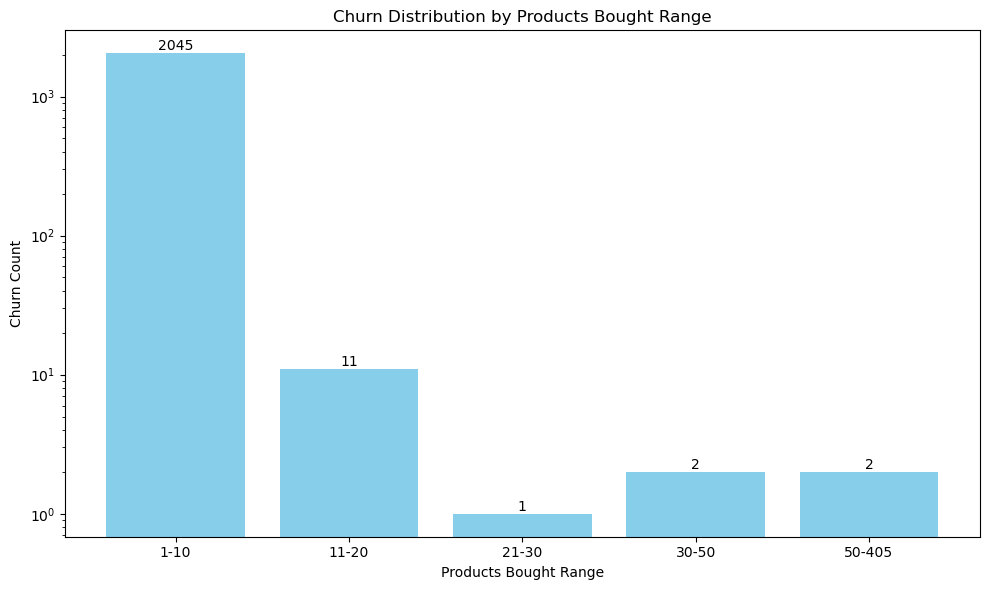

In [158]:
products_bought_ranges = ['1-10', '11-20', '21-30', '30-50', '50-405']
churn_counts = [2045, 11, 1, 2, 2]

# Define custom colors
colors = ['skyblue']

# Plotting the bar chart with logarithmic scale on y-axis
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
bars = plt.bar(products_bought_ranges, churn_counts, color=colors)

# Adding labels and title
plt.xlabel('Products Bought Range')
plt.ylabel('Churn Count')
plt.title('Churn Distribution by Products Bought Range')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Set log scale for y-axis
plt.yscale('log')

# Display the plot
plt.tight_layout()  # Ensures labels fit within the figure area
plt.show()


#### Customer who did not Churn by product bought

In [46]:
#Customers who did not Churn
churn_counts = data[data['churn'] == 'no'].groupby(['productsBoughtRange'], observed=True).size()
print(churn_counts)

productsBoughtRange
1-10      1943
11-20      110
21-30       42
30-50       27
50-405      17
dtype: int64


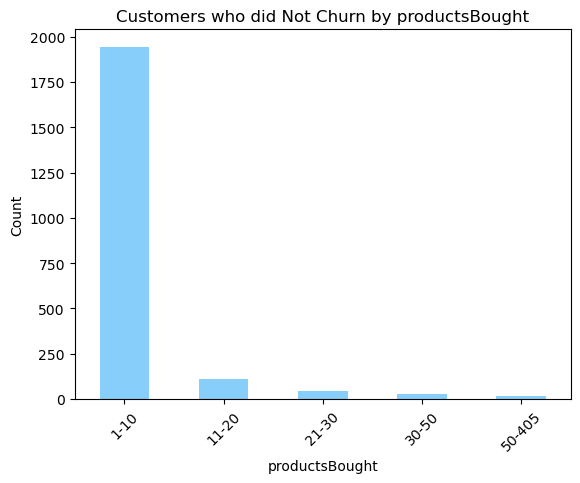

In [47]:
churn_counts = data[data['churn'] == 'no'].groupby(['productsBoughtRange'], observed=True).size()

# Plotting
churn_counts.plot(kind='bar', color='lightskyblue')
plt.xlabel('productsBought')
plt.ylabel('Count')
plt.title('Customers who did Not Churn by productsBought')
plt.xticks(rotation=45)
plt.show()

### Summary of the product bought

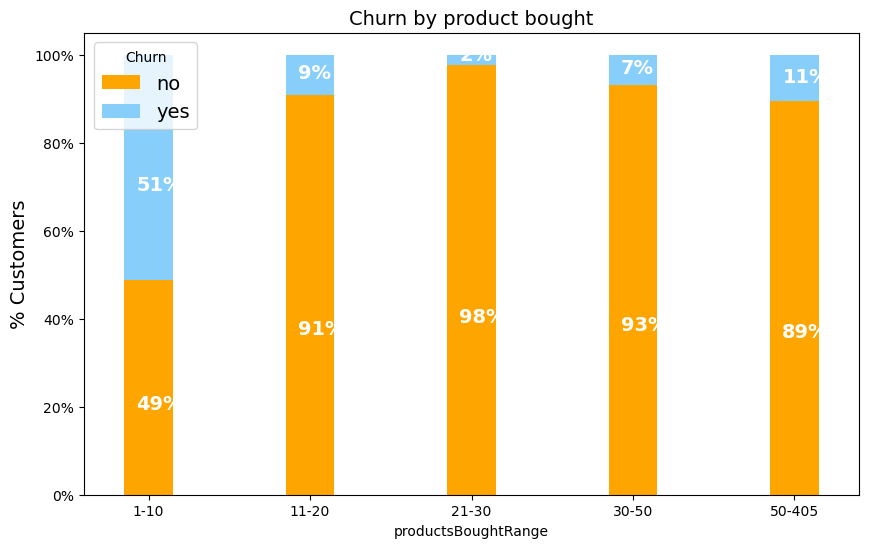

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

colors = ['orange', 'lightskyblue']
contract_churn = data.groupby(['productsBoughtRange','churn'], observed=True).size().unstack()

ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                               width=0.3,
                                                               stacked=True,
                                                               rot=0,
                                                               figsize=(10,6),
                                                               color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by product bought', size=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show()

- It can be noted that the number of customer that churned are not committed customer. 
- They are majorly people that make one-off purchase

### Distribution of socialProductsLiked  by Churn

#### 

#### 

### Data Pre-processing

Here we;
- Further explored the relationships between variables and identified patterns or trends.
- Performed feature engineering by creating new features/columns and transforming existing ones to better represent the data and improve model performance.
- Utilised encoding techniques like Label Encoder and One Hot Encoder.
- Performed Normalization using Min Max Scaler
- Performed Feature Selection for dimensionality reduction using “Recursive Feature Elimination (RFE)” to reduce complexity and improve model performance.

### Label Encoding

#### Here we will perform Label Encoding to transform categorical columns with 2 observations to 0 and 1 
#### And use One Hot Encoder for columns with more than 2 observations
#### we will drop redundant columns too

In [49]:
data.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.590400e+04,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000,15904.000000
mean,1.829659e+09,4.720573,10.410526,21.401094,0.506476,0.685048,4.606149,7.855822,0.853433,1.799736,363.445674,3062.035526,102.067685,8.505605
std,1.116127e+09,9.048898,131.692651,444.783030,4.743985,4.854310,19.761240,58.181918,5.306024,0.431947,271.578735,168.683713,5.622550,0.468898
min,5.241960e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,1.051722e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,66.000000,2857.000000,95.230000,7.940000
50%,1.698300e+09,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,359.000000,3196.000000,106.530000,8.880000
75%,2.374369e+09,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,662.000000,3201.000000,106.700000,8.890000
max,4.294967e+09,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


#### Dropping redundant columns

In [50]:
# List of columns to drop
columns_to_drop = ['country', 'identifierHash', 'seniority', 'countryCode', 'civilityGenderId', 'hasAnyApp', 'type', 'productsBoughtRange']

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [51]:
data.dtypes

language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityTitle            object
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniorityAsMonths       float64
seniorityAsYears        float64
churn                  category
dtype: object

In [52]:
print(data.head())

  language  socialNbFollowers  socialNbFollows  socialProductsLiked  \
0       en                147               10                   77   
1       en                167                8                    2   
2       fr                137               13                   60   
5       de                130               12                    1   
6       en                121                0                 1140   

   productsListed  productsSold  productsPassRate  productsWished  \
0              26           174              74.0             104   
1              19           170              99.0               0   
2              33           163              94.0              10   
5              47           123              91.0               0   
6              31           108              94.0             531   

   productsBought gender civilityTitle  hasAndroidApp  hasIosApp  \
0               1      M            mr          False       True   
1               0     

In [53]:
data.dtypes

language                 object
socialNbFollowers         int64
socialNbFollows           int64
socialProductsLiked       int64
productsListed            int64
productsSold              int64
productsPassRate        float64
productsWished            int64
productsBought            int64
gender                   object
civilityTitle            object
hasAndroidApp              bool
hasIosApp                  bool
hasProfilePicture          bool
daysSinceLastLogin        int64
seniorityAsMonths       float64
seniorityAsYears        float64
churn                  category
dtype: object

In [54]:
data.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityTitle,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsMonths,seniorityAsYears,churn
0,en,147,10,77,26,174,74.0,104,1,M,mr,False,True,True,11,106.53,8.88,no
1,en,167,8,2,19,170,99.0,0,0,F,mrs,False,True,True,12,106.80,8.90,no
2,fr,137,13,60,33,163,94.0,10,3,F,mrs,False,True,False,11,106.77,8.90,no
5,de,130,12,1,47,123,91.0,0,0,F,mrs,False,True,False,11,106.53,8.88,no
6,en,121,0,1140,31,108,94.0,531,105,F,miss,True,False,False,11,106.60,8.88,no


#### 

In [55]:
data.shape

(15904, 18)

## Feature Engineering

- Feature Extraction
- Feature Transformation

### Using One Hot Encoder


In [56]:
data1 = data.drop(['civilityTitle'], axis=1)

# Assuming 'data' is your DataFrame
#Convert 'Churn' column to numeric: 1 for 'Yes', 0 for 'No'
data1['churn'] = data1['churn'].map({'yes': 1, 'no': 0}).astype(int)

data2 = pd.get_dummies(data1)

data2['daysSinceLastLogin'] = pd.to_datetime(data2['daysSinceLastLogin']).astype(np.int64)

data2.astype(int)

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,hasAndroidApp,hasIosApp,...,seniorityAsMonths,seniorityAsYears,churn,language_de,language_en,language_es,language_fr,language_it,gender_F,gender_M
0,147,10,77,26,174,74,104,1,0,1,...,106,8,0,0,1,0,0,0,0,1
1,167,8,2,19,170,99,0,0,0,1,...,106,8,0,0,1,0,0,0,1,0
2,137,13,60,33,163,94,10,3,0,1,...,106,8,0,0,0,0,1,0,1,0
5,130,12,1,47,123,91,0,0,0,1,...,106,8,0,1,0,0,0,0,1,0
6,121,0,1140,31,108,94,531,105,1,0,...,106,8,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98884,3,8,1,0,0,0,0,0,0,1,...,106,8,0,1,0,0,0,0,1,0
98889,3,8,1,0,0,0,4,0,0,0,...,106,8,1,0,0,0,1,0,1,0
98896,3,8,10,0,0,0,0,0,0,1,...,106,8,0,0,1,0,0,0,1,0
98898,3,8,5,0,0,0,2,5,0,0,...,106,8,1,0,0,0,1,0,1,0


In [57]:
#Let's view the data to ensure the columns have been coverted accordingly
data2.dtypes

socialNbFollowers        int64
socialNbFollows          int64
socialProductsLiked      int64
productsListed           int64
productsSold             int64
productsPassRate       float64
productsWished           int64
productsBought           int64
hasAndroidApp             bool
hasIosApp                 bool
hasProfilePicture         bool
daysSinceLastLogin       int64
seniorityAsMonths      float64
seniorityAsYears       float64
churn                    int32
language_de              uint8
language_en              uint8
language_es              uint8
language_fr              uint8
language_it              uint8
gender_F                 uint8
gender_M                 uint8
dtype: object

In [58]:
data2.head(20)

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,hasAndroidApp,hasIosApp,...,seniorityAsMonths,seniorityAsYears,churn,language_de,language_en,language_es,language_fr,language_it,gender_F,gender_M
0,147,10,77,26,174,74.0,104,1,False,True,...,106.53,8.88,0,0,1,0,0,0,0,1
1,167,8,2,19,170,99.0,0,0,False,True,...,106.80,8.90,0,0,1,0,0,0,1,0
2,137,13,60,33,163,94.0,10,3,False,True,...,106.77,8.90,0,0,0,0,1,0,1,0
5,130,12,1,47,123,91.0,0,0,False,True,...,106.53,8.88,0,1,0,0,0,0,1,0
6,121,0,1140,31,108,94.0,531,105,True,False,...,106.60,8.88,0,0,1,0,0,0,1,0
7,53,9,3,5,106,98.0,0,0,False,True,...,95.23,7.94,0,0,0,0,1,0,1,0
8,744,13764,51671,0,104,85.0,1842,0,False,True,...,106.50,8.88,0,0,0,0,0,1,1,0
9,57,8,45,123,92,74.0,6,2,False,True,...,95.20,7.93,0,0,1,0,0,0,1,0
10,127,40,863,40,87,89.0,68,0,False,True,...,106.50,8.88,0,0,0,0,0,1,0,1
12,46,19,1308,63,87,92.0,564,36,False,True,...,106.50,8.88,0,0,0,1,0,0,1,0


In [59]:
data3 = data2.drop(['daysSinceLastLogin'], axis = 1)

### Correlation Analysis

In [60]:
# Assuming 'data' is your DataFrame
#Convert 'Churn' column to numeric: 1 for 'Yes', 0 for 'No'
#data2['churn'] = data2['churn'].map({'yes': 1, 'no': 0})

# Calculate correlations between all columns and the target variable "Churn"
correlation_with_churn = data3.corr()['churn'].sort_values(ascending=False)

# Print correlation values
print(correlation_with_churn)

churn                  1.000000
hasProfilePicture      0.177075
language_fr            0.035689
gender_M               0.034553
language_de            0.020155
language_es            0.017983
seniorityAsYears       0.010515
seniorityAsMonths      0.010490
hasAndroidApp         -0.000858
language_it           -0.011934
socialNbFollows       -0.022208
gender_F              -0.034553
socialProductsLiked   -0.048598
language_en           -0.049016
hasIosApp             -0.075322
productsListed        -0.122487
socialNbFollowers     -0.126718
productsWished        -0.126916
productsBought        -0.132494
productsSold          -0.150684
productsPassRate      -0.224771
Name: churn, dtype: float64


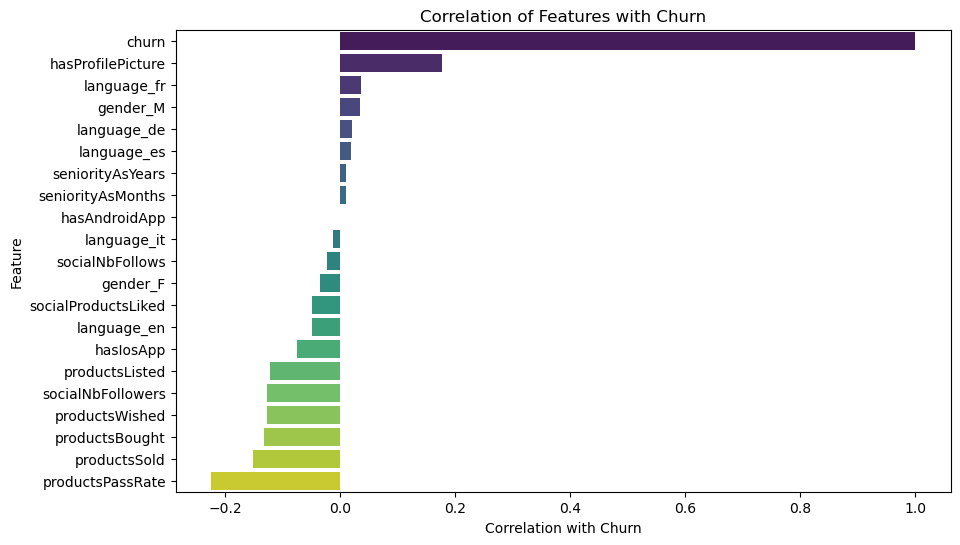

In [61]:
# Calculate correlations between all columns and the target variable "Churn"
correlation_with_churn = data3.corr()['churn'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_churn.values, y=correlation_with_churn.index, palette='viridis')
plt.xlabel('Correlation with Churn')
plt.ylabel('Feature')
plt.title('Correlation of Features with Churn')
plt.show()

#### From the above we can see that there is no perfect correlation with the target variable

####  

### Feature Selection Using SelectKBest 

Since we have 26 columns with no perfect correlation to the target variable we will be using a feature selection techniques to identify the most relevant variables for building the model. This would helps to improve the model performance, reduce overfitting, and enhance interpretability. 
For this we will be using 'SelectKBest' Mutual Information based feature selection to help identify important features. It selects the top k features with the highest mutual information scores, indicating the strength of association between each feature and the target.

#### 

## Model Building and Evaluation.

- Choose appropriate statistical or machine learning models based on the problem and data characteristics.
- Split the data into training and testing sets for model evaluation.
- Train the models on the training data and evaluate their performance using appropriate metrics.
- Fine-tune model parameters and compare different models to select the best-performing one.
- Iterate and Refine Review the analysis process and results, and iterate as needed to refine the analysis or address new questions or insights.

### Splitting the Data into Training and Testing

In [62]:
X = data3.drop('churn', axis = 1)

y = data3['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 

### Normalizing the Data Using MinMaxScaler

We will apply normalization technique on the dataset because the dataset columns are of  different scale. Here we will using the Min Max Scaler to normalize the dataset.

In [63]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [64]:
# Fit the scaler to your training data and transform it
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

# Now X_train_normalized and X_test_normalized contain the normalized data

#### 

### Selecting the Model
Here we will be using 4 models 
- Logistic Regression Model
- Random Forest Classifier
- Support Vector Machine Classifier

After which we will select the best fit model

### Models

In [65]:
#Initializing Models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm_model = SVC(probability=True)

### 

## EXPERIMENT 1

### Using All the Features without SelectKBest

First let's build our model using all the features after which we will use the SelectKBest on top 10 and 20

### Logistic Regression

In [66]:
# Train and evaluate Logistic Regression model on normalized data
logistic_regression.fit(X_train_normalized, y_train)
y_pred_lr_normalized = logistic_regression.predict(X_test_normalized)
accuracy_lr_normalized = accuracy_score(y_test, y_pred_lr_normalized)
conf_matrix_lr_normalized = confusion_matrix(y_test, y_pred_lr_normalized)

# Make predictions on the train set
y_pred_train_lr_normalized = logistic_regression.predict(X_train_normalized)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr_normalized = accuracy_score(y_train, y_pred_train_lr_normalized)
print("Logistic Regression Accuracy on the train set (Normalized Data):", train_accuracy_lr_normalized)

# Print the accuracy of the test set for Logistic Regression model
print("Logistic Regression Accuracy (Normalized Data - Test Set):", accuracy_lr_normalized)
print("Logistic Regression Classification Report (Normalized Data):")
print(classification_report(y_test, y_pred_lr_normalized))
print("Logistic Regression Confusion Matrix (Normalized Data):")
print(conf_matrix_lr_normalized)

Logistic Regression Accuracy on the train set (Normalized Data): 0.6857659357069873
Logistic Regression Accuracy (Normalized Data - Test Set): 0.6906633134234518
Logistic Regression Classification Report (Normalized Data):
              precision    recall  f1-score   support

           0       0.74      0.21      0.32      1138
           1       0.68      0.96      0.80      2043

    accuracy                           0.69      3181
   macro avg       0.71      0.58      0.56      3181
weighted avg       0.71      0.69      0.63      3181

Logistic Regression Confusion Matrix (Normalized Data):
[[ 236  902]
 [  82 1961]]


- Importing evaluation metric from sklearn

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [68]:
lr_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train, y_pred_train_lr_normalized), recall_score(y_train,  y_pred_train_lr_normalized),  precision_score(y_train,  y_pred_train_lr_normalized),
                accuracy_score(y_train,  y_pred_train_lr_normalized)]}

df_lr = pd.DataFrame(lr_evaluation)
 
# Print the output.
print(df_lr)

            metric  lr_value
0         F1 score  0.795310
1     Recall score  0.951838
2  Precision score  0.682993
3   Accuracy score  0.685766


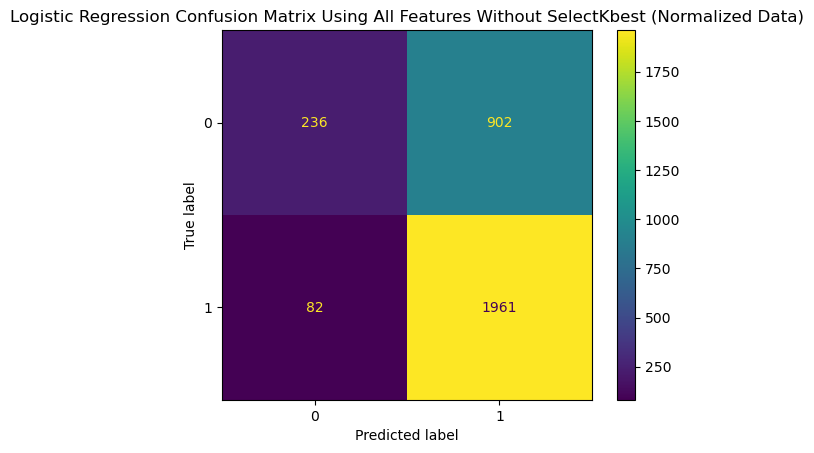

In [69]:
# Plotting the Confusion Matrix for Logistic Regression Model with Normalized Data
cm_display_lr_normalized = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr_normalized)
cm_display_lr_normalized.plot()
plt.title("Logistic Regression Confusion Matrix Using All Features Without SelectKbest (Normalized Data)")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable

- The pecision is the proportion of positive prediction. In our data the true positive is predicting rightly that a customer will churn. The Logistic Regression Model is able to predict 1961 actual churn and False Negative of 82 incorrectly predicting that a customer will not churn when they actually did. The True Negatives predicted 236 Correctly predicting that a customer will not churn and False Positive of 902 Incorrectly predicting that a customer will churn when they did not.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.32 which is very bad model and shows how inaccurate our model predicts a customer will not churn

- The model does much more better if it F1 score is more than 0.7

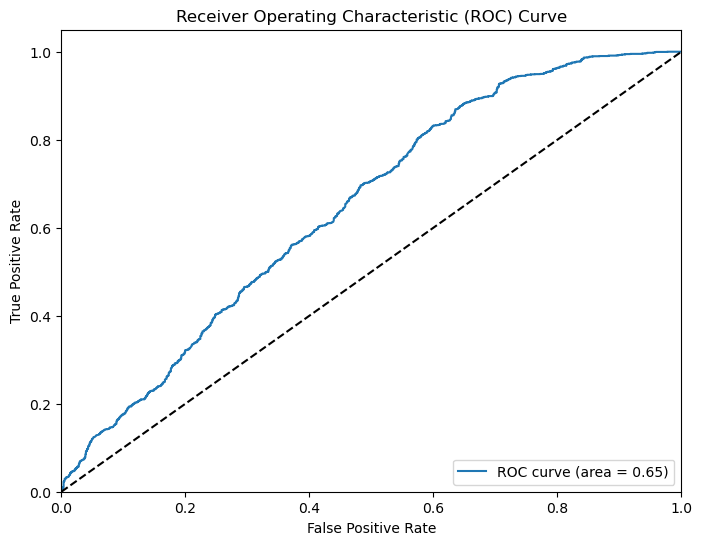

In [70]:
# Plotting the ROC curve for Logistic Regression Model with Normalized Data
y_prob_lr_normalized = logistic_regression.predict_proba(X_test_normalized)[:, 1]
fpr_lr_normalized, tpr_lr_normalized, thresholds_lr_normalized = roc_curve(y_test, y_prob_lr_normalized)
auc_lr_normalized = roc_auc_score(y_test, y_prob_lr_normalized)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_normalized, tpr_lr_normalized, label='ROC curve (area = %0.2f)' % auc_lr_normalized)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 

### SVM Model

In [71]:
%%time


# Train the SVM model on normalized data without RFE
svm_model.fit(X_train_normalized, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_normalized)

# Make predictions on the train set
y_pred_train_svm = svm_model.predict(X_train_normalized)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
print("SVM Accuracy on the train set (Normalized Data without SelectKBest):", train_accuracy_svm)


# Evaluate the model
print("Scenario: Normalized data without SelectKBest")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

SVM Accuracy on the train set (Normalized Data without SelectKBest): 0.6849013597421991
Scenario: Normalized data without SelectKBest
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.20      0.32      1138
           1       0.68      0.96      0.80      2043

    accuracy                           0.69      3181
   macro avg       0.71      0.58      0.56      3181
weighted avg       0.70      0.69      0.63      3181

Confusion Matrix:
[[ 233  905]
 [  86 1957]]
CPU times: total: 58.7 s
Wall time: 1min 10s


In [72]:
svm_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train, y_pred_train_svm), recall_score(y_train,  y_pred_train_svm),  precision_score(y_train,  y_pred_train_svm),
                accuracy_score(y_train,  y_pred_train_svm)]}

df_svm = pd.DataFrame(svm_evaluation)
 
# Print the output.
print(df_svm)

            metric  svm_value
0         F1 score   0.795219
1     Recall score   0.953922
2  Precision score   0.681790
3   Accuracy score   0.684901


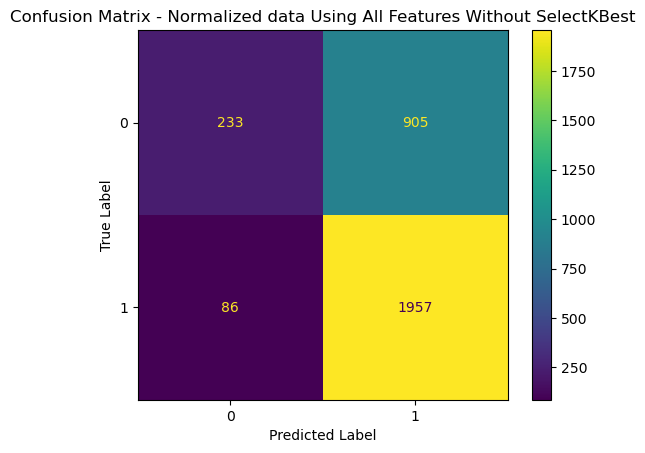

In [73]:
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.title("Confusion Matrix - Normalized data Using All Features Without SelectKBest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- In our data the true positive is predicting rightly that a customer will churn. The SVM Model is able to predict 1957 actual churn and False Negative of 86 incorrectly predicting that a customer did not churn when they actually did. The True Negatives predicted 233 Correctly predicting that a customer will not churn and False Positive of 905 Incorrectly predicting that a customer will churn when they did not.

AUC: 0.7026556452785326


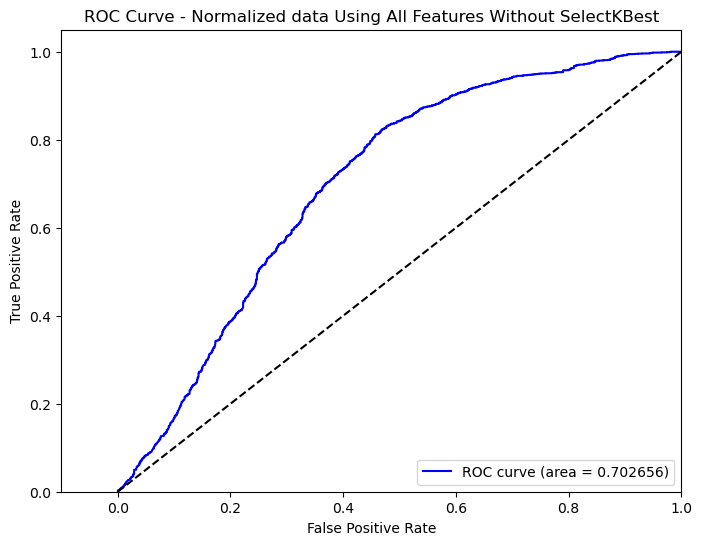

In [74]:
# Compute the probability estimates for positive class
y_prob = svm_model.predict_proba(X_test_normalized)[:, 1]

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print('AUC:', auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC Curve - Normalized data Using All Features Without SelectKBest')
plt.show()

### 

### Random Forest Model

In [75]:
%%time

# Train and evaluate Random Forest model on normalized data
random_forest.fit(X_train_normalized, y_train)
y_pred_rf = random_forest.predict(X_test_normalized)

# Compute confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Make predictions on the train set
y_pred_train_rf = random_forest.predict(X_train_normalized)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
print("Random Forest Accuracy on the train set (Normalized Data):", train_accuracy_rf)

# Print accuracy, classification report, and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_rf)
print("Random Forest Classification Report (Normalized Data):")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix (Normalized Data):")
print(conf_matrix_rf)

Random Forest Accuracy on the train set (Normalized Data): 0.9528413110115539
Random Forest Accuracy (Normalized Data - Test Set): 0.7356177302734989
Random Forest Classification Report (Normalized Data):
              precision    recall  f1-score   support

           0       0.66      0.54      0.59      1138
           1       0.77      0.84      0.80      2043

    accuracy                           0.74      3181
   macro avg       0.71      0.69      0.70      3181
weighted avg       0.73      0.74      0.73      3181

Random Forest Confusion Matrix (Normalized Data):
[[ 617  521]
 [ 320 1723]]
CPU times: total: 1.45 s
Wall time: 1.94 s


In [76]:
rf_evaluation1 = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train, y_pred_train_rf), recall_score(y_train,  y_pred_train_rf),  precision_score(y_train,  y_pred_train_rf),
                accuracy_score(y_train,  y_pred_train_rf)]}

df_rf = pd.DataFrame(rf_evaluation1)
 
# Print the output.
print(df_rf)

            metric  rf_value
0         F1 score  0.964213
1     Recall score  0.990564
2  Precision score  0.939228
3   Accuracy score  0.952841


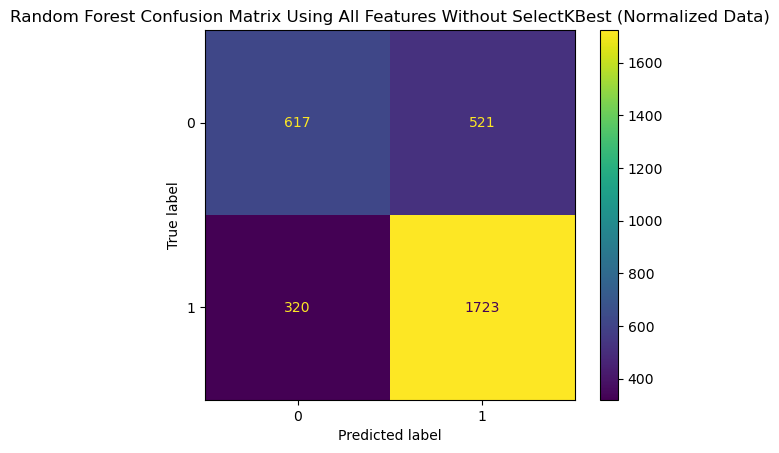

In [77]:
# Plotting the Confusion Matrix for Random Forest Model with Normalized Data
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Random Forest Confusion Matrix Using All Features Without SelectKBest (Normalized Data)")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The Random Forest Model is able to predict 1745 actual churn and False Negative of 298 incorrectly predicting that a customer will not churn when they actually did. The True Negatives predicted 620 Correctly predicting that a customer will not churn and False Positive of 518 Incorrectly predicting that a customer will churn when they did not.

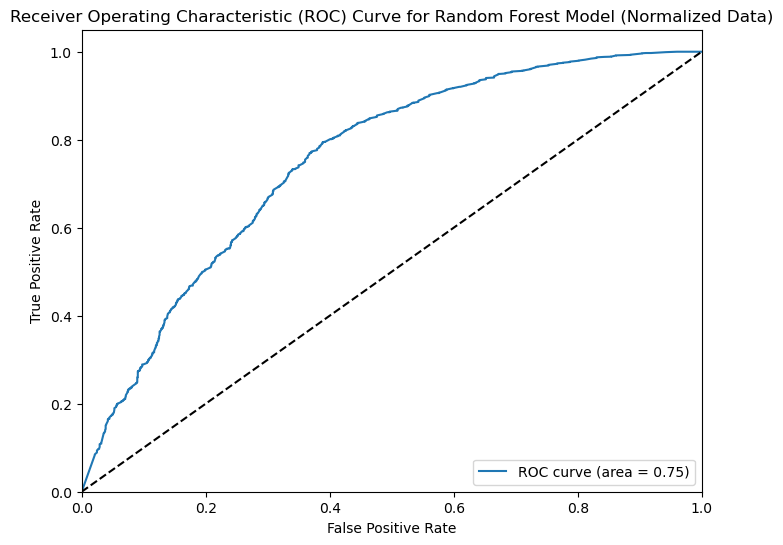

In [78]:
# Plotting the ROC curve for Random Forest Model with Normalized Data
y_prob_rf = random_forest.predict_proba(X_test_normalized)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Model (Normalized Data)')
plt.legend(loc="lower right")
plt.show()

In [79]:
df_inner1 = pd.merge(df_lr, df_svm, on='metric', how='inner')

df_inner1 = pd.merge(df_inner1, df_rf, on='metric', how='inner')

df_inner1

,metric,lr_value,svm_value,rf_value
0,F1 score,0.795310,0.795219,0.964213
1,Recall score,0.951838,0.953922,0.990564
2,Precision score,0.682993,0.681790,0.939228
3,Accuracy score,0.685766,0.684901,0.952841


#### 

## EXPERIMENT 2

### Using SeleckKBest on Top 10 Features

In [80]:
# Initialize SelectKBest with mutual information scoring function
k_best_mutual_info = SelectKBest(score_func=mutual_info_classif, k=10)  # Adjust k as needed

# Fit SelectKBest on your training data and transform both the training and test data
X_train_k_best = k_best_mutual_info.fit_transform(X_train_normalized, y_train)
X_test_k_best = k_best_mutual_info.transform(X_test_normalized)

### 

### Logistics Regression

In [81]:
# Initialize Logistic Regression model

# Fit Logistic Regression model on the top 10 features selected by SelectKBest
logistic_regression.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_lr2 = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr2 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr2 = accuracy_score(y_train, y_pred_train_lr2)
print("Logistic Regression Accuracy on the train set with top 10 features:", train_accuracy_lr2)

accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
# Print the accuracy of the test set for Logistic Regression model
print("Logistic Regression Accuracy (Normalized Data - Test Set):", accuracy_lr2)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr2))

Logistic Regression Accuracy on the train set with top 10 features: 0.6860017291519296
Logistic Regression Accuracy (Normalized Data - Test Set): 0.6912920465262496
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.22      0.33      1138
           1       0.69      0.96      0.80      2043

    accuracy                           0.69      3181
   macro avg       0.71      0.59      0.57      3181
weighted avg       0.70      0.69      0.63      3181



In [82]:
lr2_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train, y_pred_train_lr2), recall_score(y_train,  y_pred_train_lr2),  precision_score(y_train,  y_pred_train_lr2),
                accuracy_score(y_train,  y_pred_train_lr2)]}

df_lr2 = pd.DataFrame(lr2_evaluation)
 
# Print the output.
print(df_lr2)

            metric  lr_value
0         F1 score  0.794844
1     Recall score  0.948407
2  Precision score  0.684080
3   Accuracy score  0.686002


<Figure size 640x480 with 0 Axes>

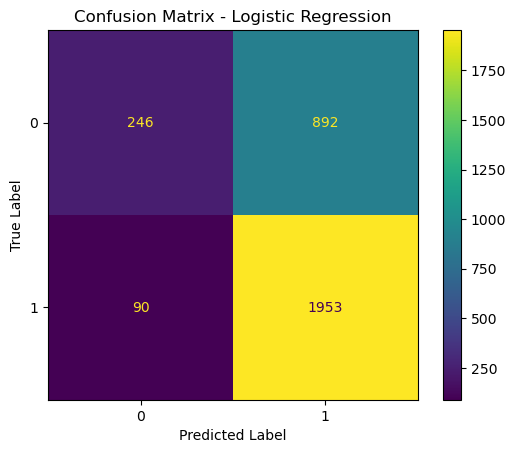

In [83]:
# Calculate the confusion matrix
conf_matrix_lr2 = confusion_matrix(y_test, y_pred_lr2)

# Plot the confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr2, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

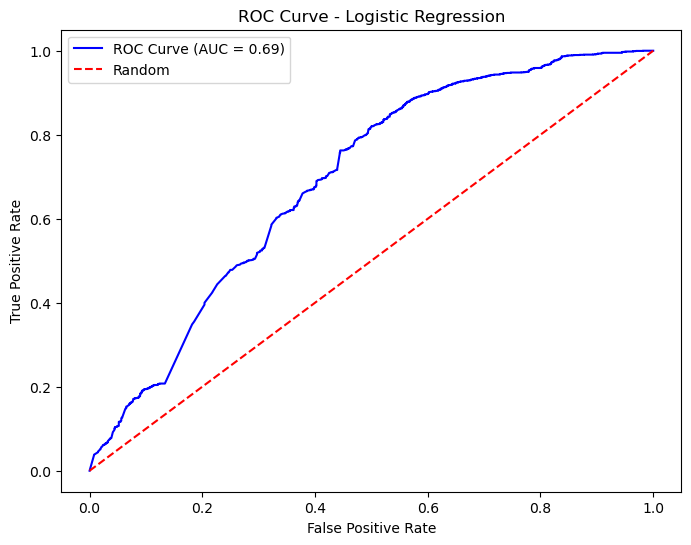

In [84]:
# Plot the ROC AUC curve
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

### 

### SVM Model

In [85]:
%%time

# Fit SVM model on the top 10 features selected by SelectKBest
svm_model.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_svm2 = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm2 = svm_model.predict(X_train_k_best)

# Make predictions on the test set
accuracy_svm2 = accuracy_score(y_test, y_pred_svm2)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm2 = accuracy_score(y_train, y_pred_train_svm2)
print("SVM Accuracy on the train set with top 10 features:", train_accuracy_svm2)

# Print the accuracy of the test set for SVM Regression model
accuracy_svm2 = accuracy_score(y_test, y_pred_svm2)
print("SVM Accuracy (Normalized Data - Test Set):", accuracy_svm2)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm2))

SVM Accuracy on the train set with top 10 features: 0.6839581859624303
SVM Accuracy (Normalized Data - Test Set): 0.6884627475636592
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.22      0.34      1138
           1       0.69      0.95      0.80      2043

    accuracy                           0.69      3181
   macro avg       0.70      0.58      0.57      3181
weighted avg       0.69      0.69      0.63      3181

CPU times: total: 58.6 s
Wall time: 1min 10s


In [86]:
svm2_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train, y_pred_train_svm2), recall_score(y_train,  y_pred_train_svm2),  precision_score(y_train,  y_pred_train_svm2),
                accuracy_score(y_train,  y_pred_train_svm2)]}

df_svm2 = pd.DataFrame(svm2_evaluation)
 
# Print the output.
print(df_svm2)

            metric  svm_value
0         F1 score   0.792614
1     Recall score   0.941667
2  Precision score   0.684300
3   Accuracy score   0.683958


<Figure size 640x480 with 0 Axes>

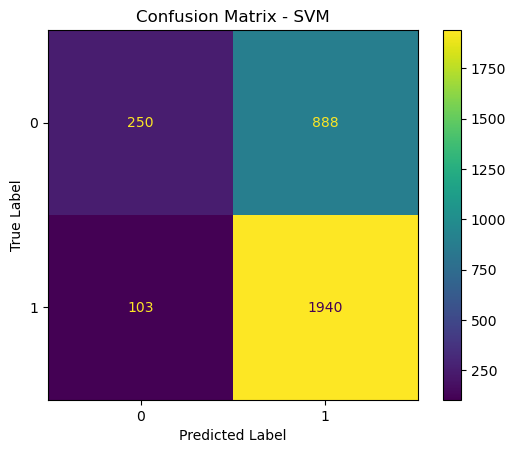

In [87]:
# Calculate the confusion matrix
conf_matrix_svm2 = confusion_matrix(y_test, y_pred_svm2)

# Plot the confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm2, display_labels=svm_model.classes_)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

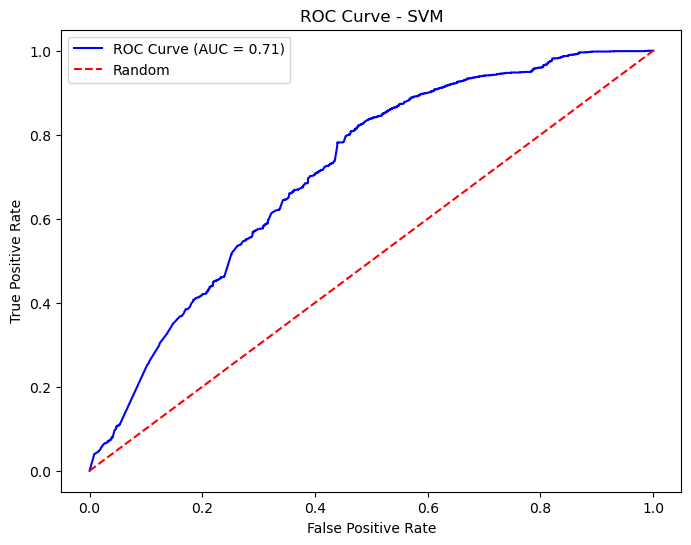

In [88]:
# Calculate decision function scores
y_score_svm = svm_model.decision_function(X_test_k_best)

# Compute fpr, tpr, and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

### 

### Random Forest Model

In [89]:
# Fit Random Forest model on the top 10 features selected by SelectKBest
random_forest.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_rf2 = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf2 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf2 = accuracy_score(y_train, y_pred_train_rf2)
print("Random Forest Accuracy on the train set with top 10 features:", train_accuracy_rf2)

# print accuracy on test set
accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_rf2)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf2))

Random Forest Accuracy on the train set with top 10 features: 0.8646545626031596
Random Forest Accuracy (Normalized Data - Test Set): 0.7456774599182647
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59      1138
           1       0.76      0.87      0.82      2043

    accuracy                           0.75      3181
   macro avg       0.73      0.70      0.70      3181
weighted avg       0.74      0.75      0.74      3181



In [90]:
rf2_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train, y_pred_train_rf2), recall_score(y_train,  y_pred_train_rf2),  precision_score(y_train,  y_pred_train_rf2),
                accuracy_score(y_train,  y_pred_train_rf2)]}

df_rf2 = pd.DataFrame(rf2_evaluation)
 
# Print the output.
print(df_rf2)

            metric  rf_value
0         F1 score  0.902326
1     Recall score  0.974755
2  Precision score  0.839916
3   Accuracy score  0.864655


<Figure size 640x480 with 0 Axes>

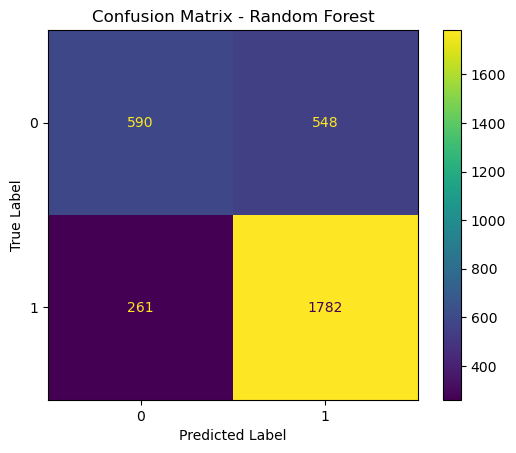

In [91]:
# Calculate the confusion matrix
conf_matrix_rf2 = confusion_matrix(y_test, y_pred_rf2)

# Plot the confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf2, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

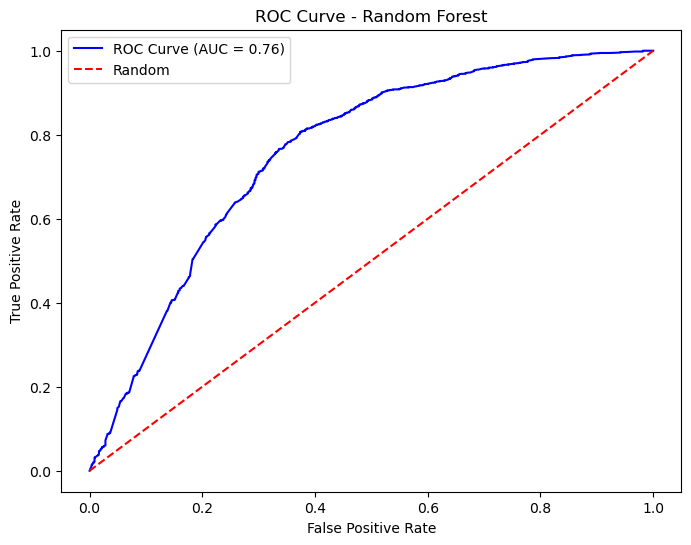

In [92]:
# Plot the ROC AUC curve
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [93]:
df_inner2 = pd.merge(df_lr2, df_svm2, on='metric', how='inner')

df_inner2 = pd.merge(df_inner2, df_rf2, on='metric', how='inner')

df_inner2

,metric,lr_value,svm_value,rf_value
0,F1 score,0.794844,0.792614,0.902326
1,Recall score,0.948407,0.941667,0.974755
2,Precision score,0.684080,0.684300,0.839916
3,Accuracy score,0.686002,0.683958,0.864655


### 

#### 

## EXPERIMENT 3

### PERFORMING SELECTKBEST ON TOP TWENTY (20) FEATURES

#### Logistic Regression, SVM Model and Random Forest Using 20 Top features

In [94]:
# Initialize SelectKBest with mutual information scoring function
k_best_mutual_info = SelectKBest(score_func=mutual_info_classif, k=20)  # Adjust k as needed

# Fit SelectKBest on your training data and transform both the training and test data
X_train_k_best = k_best_mutual_info.fit_transform(X_train_normalized, y_train)
X_test_k_best = k_best_mutual_info.transform(X_test_normalized)

### 

### Logistics Regression Model

In [95]:
# Initialize Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Fit Logistic Regression model on the top 20 features selected by SelectKBest
logistic_regression.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_lr3 = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr3 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr3 = accuracy_score(y_train, y_pred_train_lr3)
print("Logistic Regression Accuracy on the train set with top 20 features:", train_accuracy_lr3)

# print accuracy on test set
accuracy_lr3 = accuracy_score(y_test, y_pred_lr3)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_lr3)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr3))

Logistic Regression Accuracy on the train set with top 20 features: 0.6857659357069873
Random Forest Accuracy (Normalized Data - Test Set): 0.6906633134234518
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.21      0.32      1138
           1       0.68      0.96      0.80      2043

    accuracy                           0.69      3181
   macro avg       0.71      0.58      0.56      3181
weighted avg       0.71      0.69      0.63      3181



In [96]:
lr3_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train, y_pred_train_lr3), recall_score(y_train,  y_pred_train_lr3),  precision_score(y_train,  y_pred_train_lr3),
                accuracy_score(y_train,  y_pred_train_lr3)]}

df_lr3 = pd.DataFrame(lr3_evaluation)
 
# Print the output.
print(df_lr3)

            metric  lr_value
0         F1 score  0.795310
1     Recall score  0.951838
2  Precision score  0.682993
3   Accuracy score  0.685766


<Figure size 640x480 with 0 Axes>

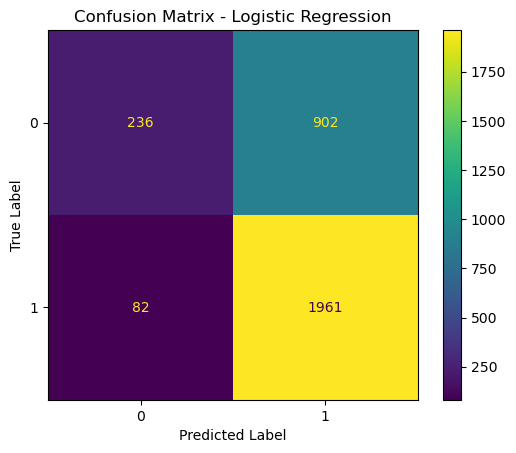

In [97]:
# Calculate the confusion matrix
conf_matrix_lr3 = confusion_matrix(y_test, y_pred_lr3)

# Plot the confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr3, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

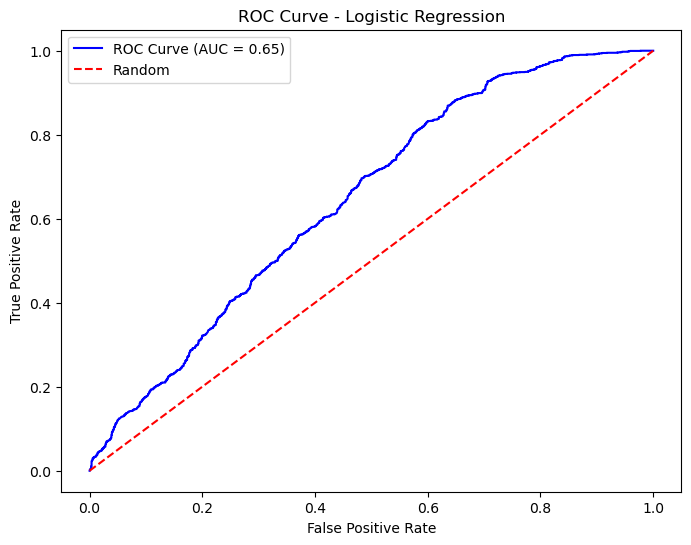

In [98]:
# Plot the ROC AUC curve
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

#### 

### 

### SVM Model

In [99]:
%%time

#Initialize the Model
svm_model = SVC(probability=True)

# Fit SVM model on the top 20 features selected by SelectKBest
svm_model.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_svm3 = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm3 = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm3 = accuracy_score(y_train, y_pred_train_svm3)
print("SVM Accuracy on the train set with top 20 features:", train_accuracy_svm3)

# print accuracy on test set
accuracy_svm3 = accuracy_score(y_test, y_pred_svm3)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_svm3)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm3))

SVM Accuracy on the train set with top 20 features: 0.6849013597421991
Random Forest Accuracy (Normalized Data - Test Set): 0.6884627475636592
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.20      0.32      1138
           1       0.68      0.96      0.80      2043

    accuracy                           0.69      3181
   macro avg       0.71      0.58      0.56      3181
weighted avg       0.70      0.69      0.63      3181

CPU times: total: 57.9 s
Wall time: 1min 9s


In [100]:
svm3_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train, y_pred_train_svm3), recall_score(y_train,  y_pred_train_svm3),  precision_score(y_train,  y_pred_train_svm3),
                accuracy_score(y_train,  y_pred_train_svm3)]}

df_svm3 = pd.DataFrame(svm3_evaluation)
 
# Print the output.
print(df_svm3)

            metric  svm_value
0         F1 score   0.795219
1     Recall score   0.953922
2  Precision score   0.681790
3   Accuracy score   0.684901


<Figure size 640x480 with 0 Axes>

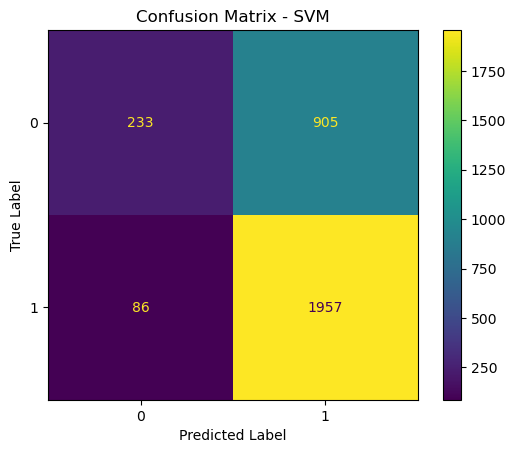

In [101]:
# Calculate the confusion matrix
conf_matrix_svm3 = confusion_matrix(y_test, y_pred_svm3)

# Plot the confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm3, display_labels=svm_model.classes_)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

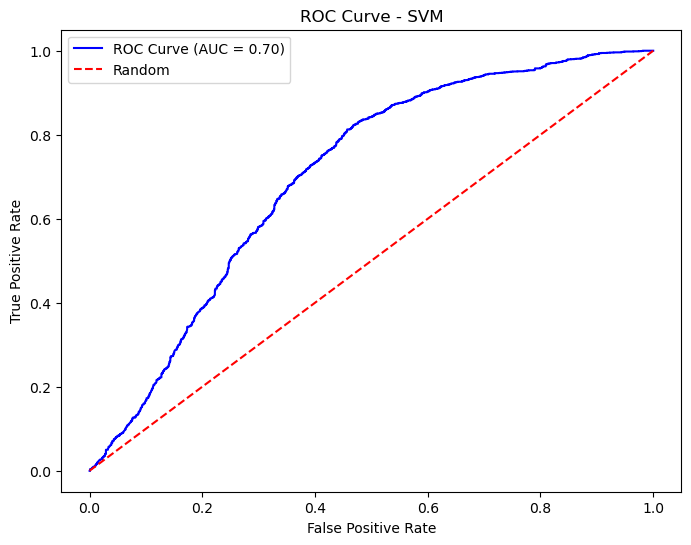

In [102]:
# Get probability estimates
y_prob_svm = svm_model.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class

# Compute fpr, tpr, and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

### 

### 

### Random Forest Model

In [103]:
%%time

#Initialize Models
random_forest = RandomForestClassifier()### Random Forest Model

# Fit Random Forest model on the top 20 features selected by SelectKBest
random_forest.fit(X_train_k_best, y_train)

# Make predictions on the test data
y_pred_rf3 = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf3 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf3 = accuracy_score(y_train, y_pred_train_rf3)
print("Random Forest Accuracy on the train set with top 20 features:", train_accuracy_rf3)

# print accuracy on test set
accuracy_rf3 = accuracy_score(y_test, y_pred_rf3)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_rf3)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf3))

Random Forest Accuracy on the train set with top 20 features: 0.9529199088265347
Random Forest Accuracy (Normalized Data - Test Set): 0.7337315309651053
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      1138
           1       0.77      0.84      0.80      2043

    accuracy                           0.73      3181
   macro avg       0.71      0.69      0.70      3181
weighted avg       0.73      0.73      0.73      3181

CPU times: total: 922 ms
Wall time: 2.44 s


In [104]:
rf3_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train, y_pred_train_rf3), recall_score(y_train,  y_pred_train_rf3),  precision_score(y_train,  y_pred_train_rf3),
                accuracy_score(y_train,  y_pred_train_rf3)]}

df_rf3 = pd.DataFrame(rf3_evaluation)
 
# Print the output.
print(df_rf3)

            metric  rf_value
0         F1 score  0.964249
1     Recall score  0.989951
2  Precision score  0.939849
3   Accuracy score  0.952920


<Figure size 640x480 with 0 Axes>

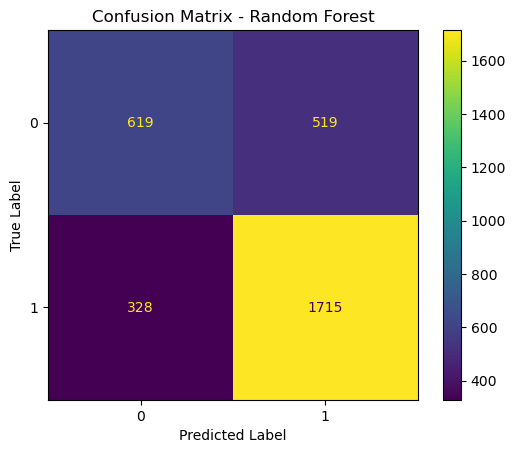

In [105]:
# Calculate the confusion matrix
conf_matrix_rf3 = confusion_matrix(y_test, y_pred_rf3)

# Plot the confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf3, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

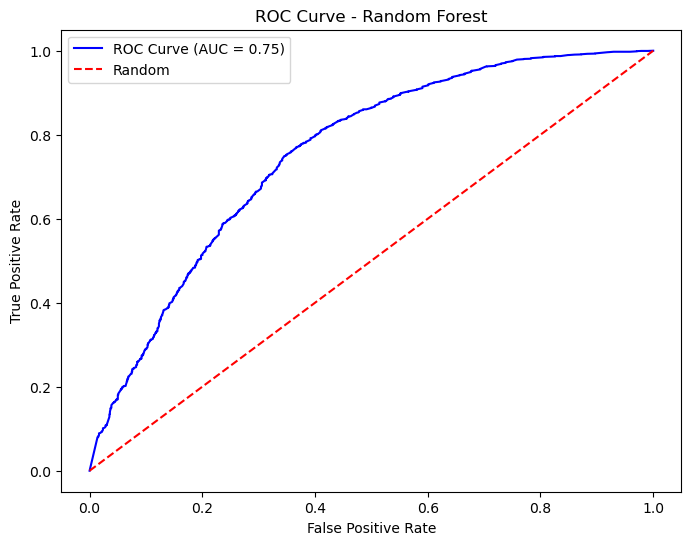

In [106]:
# Plot the ROC AUC curve
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

In [107]:
df_inner3 = pd.merge(df_lr3, df_svm3, on='metric', how='inner')

df_inner3 = pd.merge(df_inner3, df_rf3, on='metric', how='inner')

df_inner3

,metric,lr_value,svm_value,rf_value
0,F1 score,0.795310,0.795219,0.964249
1,Recall score,0.951838,0.953922,0.989951
2,Precision score,0.682993,0.681790,0.939849
3,Accuracy score,0.685766,0.684901,0.952920


### 

## EXPERIMENT 4

### Using SMOTE Technique with SelectKBest On TOP 10 Features
Earlier we discovered that there is a class imbalance in the target variable we will be using the SMOTE technique to address this class imabalance and compare results with other models done.

In [108]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test_normalized, y_test)

# Initialize SelectKBest with mutual information scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k=10)

# Fit SelectKBest on the SMOTE transformed training data
X_train_k_best = k_best.fit_transform(X_train_smote, y_train_smote)
X_test_k_best = k_best.fit_transform(X_test_smote, y_test_smote)

### 

### Logistic Regression Model

In [109]:
# logistic_regression = LogisticRegression(max_iter=1000)

# # Train and evaluate Logistic Regression model
# logistic_regression.fit(X_train_k_best, y_train_smote)
# y_pred_lr4 = logistic_regression.predict(X_test_k_best)

# # Make predictions on the train set
# y_pred_train_lr4 = logistic_regression.predict(X_train_k_best)

# # Compute the accuracy of the train set for Logistic Regression model
# train_accuracy_lr4 = accuracy_score(y_train_smote, y_pred_train_lr4)
# print("Logistic Regression Accuracy on the train set with SMOTE data and top features:", train_accuracy_lr4)

# print("Logistic Regression Classification Report:")
# print(classification_report(y_test, y_pred_lr4))
# print("Logistic Regression Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_lr4))


# Subset X_test_k_best to match the indices of y_test
X_test_k_best_subset = X_test_k_best[:len(y_test)]

# Create a logistic regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the logistic regression model on the SMOTE-upsampled training data
logistic_regression.fit(X_train_k_best, y_train_smote)

# Make predictions on the test set (using the subset of X_test_k_best)
y_pred_lr4 = logistic_regression.predict(X_test_k_best_subset)

# Make predictions on the train set
y_pred_train_lr4 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr4 = accuracy_score(y_train_smote, y_pred_train_lr4)
print("Logistic Regression Accuracy on the train set with SMOTE data and top features:", train_accuracy_lr4)
# print accuracy on test set
accuracy_lr4 = accuracy_score(y_test, y_pred_lr4)
print("Random Forest Accuracy (Normalized Data - Test Set):", accuracy_lr4)

# Compute and print the classification report on the test set
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr4))


Logistic Regression Accuracy on the train set with SMOTE data and top features: 0.5973039215686274
Random Forest Accuracy (Normalized Data - Test Set): 0.5529707639107199
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44      1138
           1       0.68      0.58      0.63      2043

    accuracy                           0.55      3181
   macro avg       0.54      0.54      0.54      3181
weighted avg       0.58      0.55      0.56      3181



In [110]:
lr4_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train_smote, y_pred_train_lr4), recall_score(y_train_smote,  y_pred_train_lr4),  precision_score(y_train_smote,  y_pred_train_lr4),
                accuracy_score(y_train_smote,  y_pred_train_lr4)]}

df_lr4 = pd.DataFrame(lr4_evaluation)
 
# Print the output.
print(df_lr4)

            metric  lr_value
0         F1 score  0.698946
1     Recall score  0.934926
2  Precision score  0.558083
3   Accuracy score  0.597304


<Figure size 640x480 with 0 Axes>

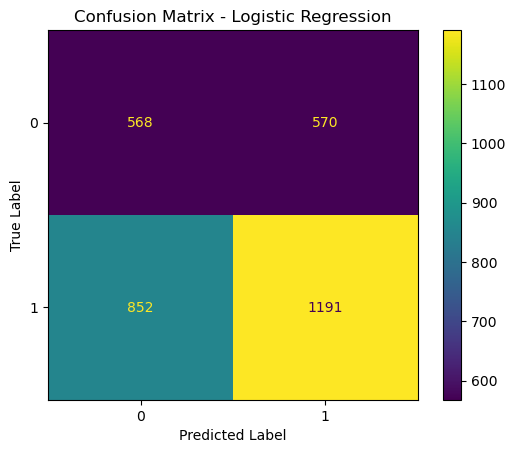

In [111]:
# Calculate confusion matrix
conf_matrix_lr4 = confusion_matrix(y_test, y_pred_lr4)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr4, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Shape of y_prob_lr before filtering: (4086,)
AUC Score: 0.6152


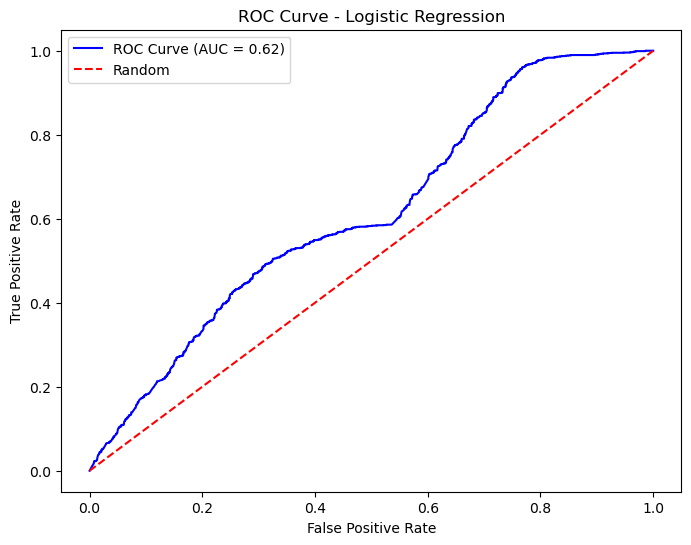

In [112]:
# # Calculate ROC AUC
# y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
# fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
# auc_lr = roc_auc_score(y_test, y_prob_lr)

# # Plot ROC AUC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Logistic Regression')
# plt.legend()
# plt.show()




# Calculate ROC AUC
# Get probabilities from logistic regression model
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class

#Ensure y_prob_lr has the correct shape
print("Shape of y_prob_lr before filtering:", y_prob_lr.shape)

# Filter y_prob_lr to match y_test
y_prob_lr_filtered = y_prob_lr[:len(y_test)]

# Compute ROC curve and ROC AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr_filtered)
auc_lr = roc_auc_score(y_test, y_prob_lr_filtered)

# Print AUC score
print(f"AUC Score: {auc_lr:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()



- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

### 

### Random Forest Model

In [113]:
%%time

# random_forest = RandomForestClassifier()

# # Train and evaluate Random Forest model
# random_forest.fit(X_train_k_best, y_train_smote)
# y_pred_rf4 = random_forest.predict(X_test_k_best)

# # Make predictions on the train set
# y_pred_train_rf4 = random_forest.predict(X_train_k_best)

# # Compute the accuracy of the train set for Random Forest model
# train_accuracy_rf4 = accuracy_score(y_train_smote, y_pred_train_rf4)
# print("Random Forest Accuracy on the train set with SMOTE data and top features:", train_accuracy_rf4)

# print("Random Forest Classification Report:")
# print(classification_report(y_test, y_pred_rf4))

# Subset X_test_k_best to match the indices of y_test
X_test_k_best_subset = X_test_k_best[:len(y_test)]

# Create a Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model on the SMOTE-upsampled training data
random_forest.fit(X_train_k_best, y_train_smote)

# Make predictions on the test set (using the subset of X_test_k_best)
y_pred_rf4 = random_forest.predict(X_test_k_best_subset)

# Make predictions on the train set
y_pred_train_rf4 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf4 = accuracy_score(y_train_smote, y_pred_train_rf4)
print("Random Forest Accuracy on the train set with SMOTE data and top features:", train_accuracy_rf4)

# Compute and print the classification report on the test set
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf4))

Random Forest Accuracy on the train set with SMOTE data and top features: 0.9204656862745098
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58      1138
           1       0.77      0.70      0.73      2043

    accuracy                           0.67      3181
   macro avg       0.65      0.66      0.66      3181
weighted avg       0.69      0.67      0.68      3181

CPU times: total: 1.81 s
Wall time: 2.41 s


In [114]:
rf4_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train_smote, y_pred_train_rf4), recall_score(y_train_smote,  y_pred_train_rf4),  precision_score(y_train_smote,  y_pred_train_rf4),
                accuracy_score(y_train_smote,  y_pred_train_rf4)]}

df_rf4 = pd.DataFrame(rf4_evaluation)
 
# Print the output.
print(df_rf4)

            metric  rf_value
0         F1 score  0.924849
1     Recall score  0.978799
2  Precision score  0.876536
3   Accuracy score  0.920466


<Figure size 640x480 with 0 Axes>

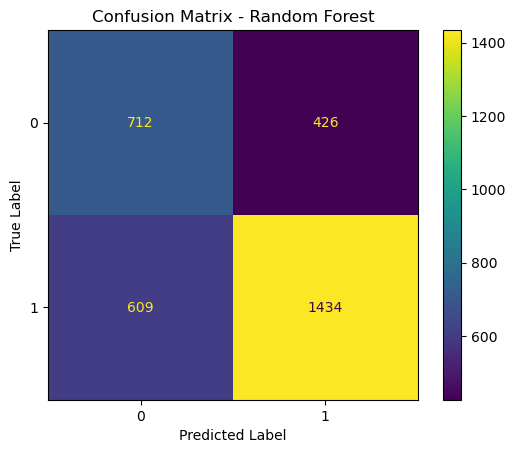

In [115]:
# Calculate confusion matrix
conf_matrix_rf4 = confusion_matrix(y_test, y_pred_rf4)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf4, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### A confusion matrix is a graphical representation of how accurate a classifier is at predicting the labels for a categorical variable
- The pecision is the proportion of positive prediction. In our data the positive prediction is predicting that a customer will churn. The Random Forest Model is able to predict 11777 actual churn and 484 wrong prediction of the right result.

- The F1 score which is a combination of both recall and precision is the best way of evaluation a classification model. It has a F1 score of 0.8767 which is very good and shows how accurate our model predicts customer churn
- The model does much more better in predicting a customer churn

Shape of y_prob_lr before filtering: (4086,)
AUC Score: 0.6152


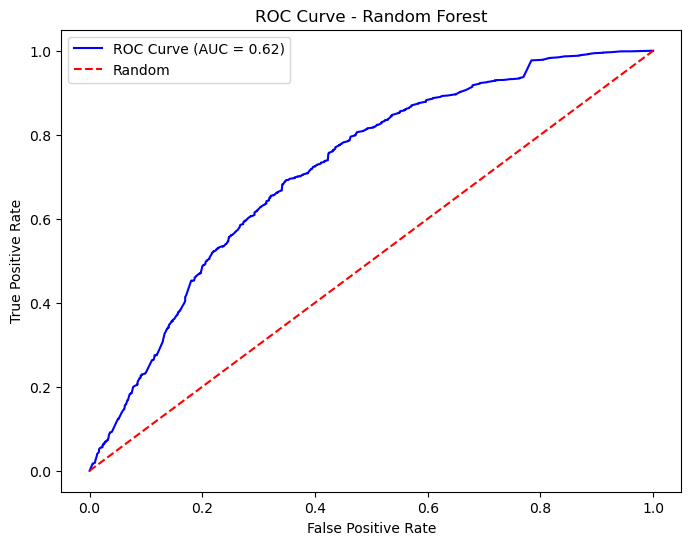

In [116]:
# # Calculate ROC AUC
# y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
# auc_rf = roc_auc_score(y_test, y_prob_rf)

# # Plot ROC AUC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Random Forest')
# plt.legend()
# plt.show()

# Assuming random_forest is already trained and X_test_k_best, y_test are defined
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class


# Ensure y_prob_lr has the correct shape
print("Shape of y_prob_lr before filtering:", y_prob_rf.shape)  # Check if it matches the number of samples in X_test_k_best

#Filter y_prob_lr to match y_test
y_prob_rf_filtered = y_prob_rf[:len(y_test)]

# Compute ROC curve and ROC AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf_filtered)
auc_rf = roc_auc_score(y_test, y_prob_lr_filtered)

# Print AUC score
print(f"AUC Score: {auc_rf:.4f}")
# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

#### 

### SVM Model

In [117]:
# svm_model = SVC()

# # Train and evaluate SVM model
# svm_model.fit(X_train_k_best, y_train_smote)
# y_pred_svm4 = svm_model.predict(X_test_k_best)

# # Make predictions on the train set
# y_pred_train_svm4 = svm_model.predict(X_train_k_best)

# # Compute the accuracy of the train set for SVM model
# train_accuracy_svm4 = accuracy_score(y_train_smote, y_pred_train_svm4)
# print("SVM Accuracy on the train set with SMOTE data and top features:", train_accuracy_svm4)
# print("SVM Classification Report:")
# print(classification_report(y_test, y_pred_svm4))

# Subset X_test_k_best to match the indices of y_test
X_test_k_best_subset = X_test_k_best[:len(y_test)]

# Create a SVM model
svm_model = SVC()

# Train the SVM model on the SMOTE-upsampled training data
svm_model.fit(X_train_k_best, y_train_smote)

# Make predictions on the test set (using the subset of X_test_k_best)
y_pred_svm4 = svm_model.predict(X_test_k_best_subset)

# Make predictions on the train set
y_pred_train_svm4 = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm4 = accuracy_score(y_train_smote, y_pred_train_svm4)
print("SVM Accuracy on the train set with SMOTE data and top features:", train_accuracy_svm4)
# Compute and print the classification report on the test set
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm4))

SVM Accuracy on the train set with SMOTE data and top features: 0.5853553921568627
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.48      0.43      1138
           1       0.67      0.58      0.62      2043

    accuracy                           0.55      3181
   macro avg       0.53      0.53      0.53      3181
weighted avg       0.57      0.55      0.55      3181



In [118]:
svm4_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train_smote, y_pred_train_svm4), recall_score(y_train_smote,  y_pred_train_svm4),  precision_score(y_train_smote,  y_pred_train_svm4),
                accuracy_score(y_train_smote,  y_pred_train_svm4)]}

df_svm4 = pd.DataFrame(svm4_evaluation)
 
# Print the output.
print(df_svm4)

            metric  svm_value
0         F1 score   0.694230
1     Recall score   0.941422
2  Precision score   0.549853
3   Accuracy score   0.585355


<Figure size 640x480 with 0 Axes>

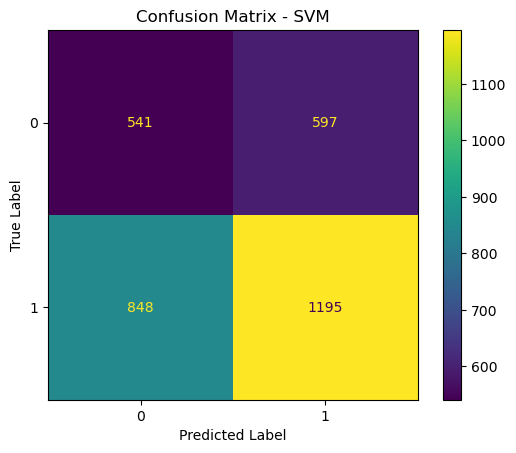

In [119]:
# Calculate confusion matrix
conf_matrix_svm4 = confusion_matrix(y_test, y_pred_svm4)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm4)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

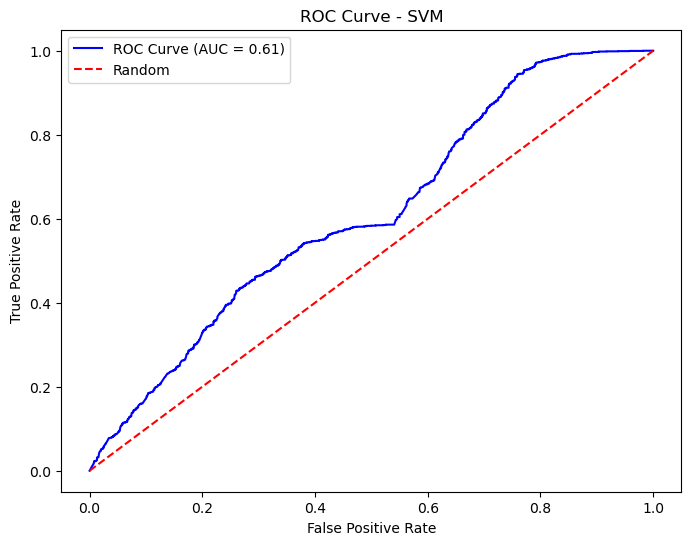

In [120]:
# # Calculate ROC AUC
# # Note: SVM does not have predict_proba method, so we'll use decision_function instead
# y_score_svm = svm_model.decision_function(X_test_k_best)
# fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
# auc_svm = roc_auc_score(y_test, y_score_svm)

# # Plot ROC AUC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - SVM')
# plt.legend()
# plt.show()

# Ensure `y_score_svm` aligns with `y_test`
y_score_svm = svm_model.decision_function(X_test_k_best[:3181])  # Use the first 3181 samples

# Compute ROC curve and ROC AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


In [121]:
df_inner4 = pd.merge(df_lr4, df_svm4, on='metric', how='inner')

df_inner4 = pd.merge(df_inner4, df_rf4, on='metric', how='inner')

df_inner4

,metric,lr_value,svm_value,rf_value
0,F1 score,0.698946,0.694230,0.924849
1,Recall score,0.934926,0.941422,0.978799
2,Precision score,0.558083,0.549853,0.876536
3,Accuracy score,0.597304,0.585355,0.920466


### Note: The Smote model will have a better result than the non smote model because imbalance will be corrected by reducing the overbalanced category to improve the model

#### 

### 

### 

## EXPERIMENT 5

### Using SMOTE Technique On SelectKBest TOP 20 Features

In [122]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

# Initialize SelectKBest with mutual information scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k=20)

# Fit SelectKBest on the SMOTE transformed training data
X_train_k_best = k_best.fit_transform(X_train_smote, y_train_smote)
X_test_k_best = k_best.transform(X_test_normalized)

### Logistic Regression Model

In [123]:
logistic_regression = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression model
logistic_regression.fit(X_train_k_best, y_train_smote)
y_pred_lr5 = logistic_regression.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_lr5 = logistic_regression.predict(X_train_k_best)

# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr5 = accuracy_score(y_train_smote, y_pred_train_lr5)
print("Logistic Regression Accuracy on the train set with SMOTE data and top features:", train_accuracy_lr5)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr5))

Logistic Regression Accuracy on the train set with SMOTE data and top features: 0.6053921568627451
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      1138
           1       0.71      0.81      0.76      2043

    accuracy                           0.67      3181
   macro avg       0.63      0.61      0.62      3181
weighted avg       0.66      0.67      0.66      3181



In [124]:
lr5_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'lr_value': [f1_score(y_train_smote, y_pred_train_lr5), recall_score(y_train_smote,  y_pred_train_lr5),  precision_score(y_train_smote,  y_pred_train_lr5),
                accuracy_score(y_train_smote,  y_pred_train_lr5)]}

df_lr5 = pd.DataFrame(lr5_evaluation)
 
# Print the output.
print(df_lr5)

            metric  lr_value
0         F1 score  0.669099
1     Recall score  0.797917
2  Precision score  0.576093
3   Accuracy score  0.605392


<Figure size 640x480 with 0 Axes>

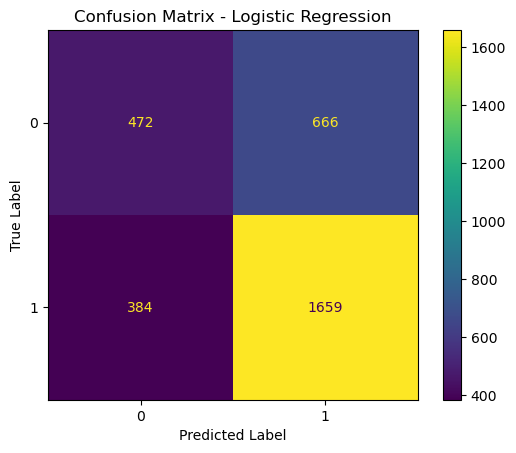

In [125]:
# Calculate confusion matrix
conf_matrix_lr5 = confusion_matrix(y_test, y_pred_lr5)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr5, display_labels=logistic_regression.classes_)
cm_display_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

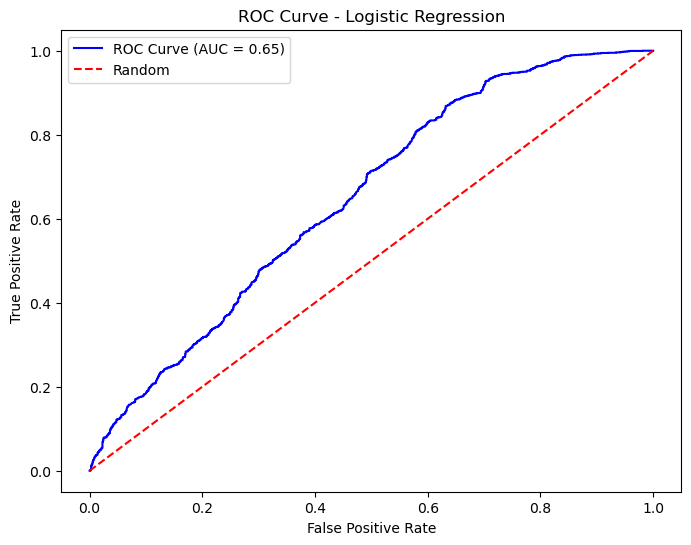

In [126]:
# Calculate ROC AUC
y_prob_lr = logistic_regression.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

### 

### Random Forest Model

In [127]:
# from xgboost import plot_importance
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [128]:
# cv_params = {'max_depth': [4,5,6,7,8],
#             'min_child_weight': [1,2,3,4,5],
#              'learning_rate': [0.1, 0.2, 0.3],
#              'n_estimators': [75,100,125]
#             }

# random_forest = RandomForestClassifier()

# scoring = {'accuracy', 'precision', 'recall', 'f1'}

# random_forest_cv = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=5, refit='f1')

In [129]:
%%time

# Train and evaluate Random Forest Model
random_forest.fit(X_train_k_best, y_train_smote)
y_pred_rf5 = random_forest.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_rf5 = random_forest.predict(X_train_k_best)

# Compute the accuracy of the train set for Random Forest model
train_accuracy_rf5 = accuracy_score(y_train_smote, y_pred_train_rf5)
print("Random Forest Accuracy on the train set with SMOTE data and top features:", train_accuracy_rf5)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf5))

Random Forest Accuracy on the train set with SMOTE data and top features: 0.9607843137254902
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1138
           1       0.77      0.81      0.79      2043

    accuracy                           0.73      3181
   macro avg       0.70      0.69      0.70      3181
weighted avg       0.72      0.73      0.72      3181

CPU times: total: 2.23 s
Wall time: 3.38 s


In [130]:
rf5_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'rf_value': [f1_score(y_train_smote, y_pred_train_rf5), recall_score(y_train_smote,  y_pred_train_rf5),  precision_score(y_train_smote,  y_pred_train_rf5),
                accuracy_score(y_train_smote,  y_pred_train_rf5)]}

df_rf5 = pd.DataFrame(rf5_evaluation)
 
# Print the output.
print(df_rf5)

            metric  rf_value
0         F1 score  0.961709
1     Recall score  0.984926
2  Precision score  0.939560
3   Accuracy score  0.960784


# This is the model that has the best F1 score, therefore it is the best model

- Note: The data was first balanced before it was model by the best 10 features of the dataset

<Figure size 640x480 with 0 Axes>

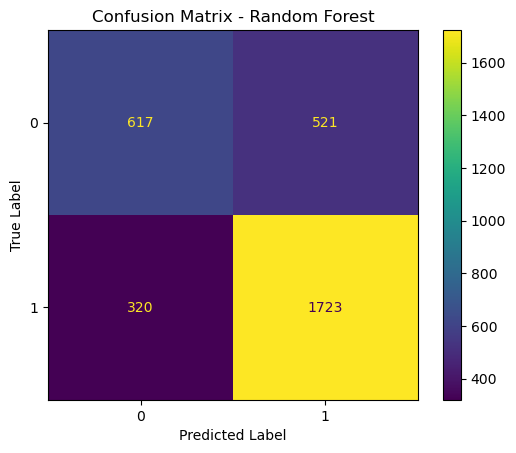

In [131]:
# Calculate confusion matrix
conf_matrix_rf5 = confusion_matrix(y_test, y_pred_rf5)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

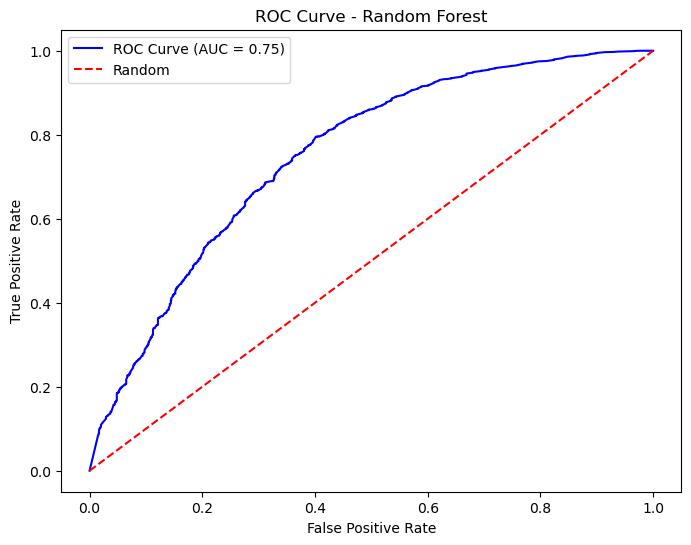

In [132]:
# Calculate ROC AUC
y_prob_rf = random_forest.predict_proba(X_test_k_best)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC Curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

### 

### 

### SVM Model

In [133]:
%%time

svm_model = SVC()

# Train and evaluate svm model
svm_model.fit(X_train_k_best, y_train_smote)
y_pred_svm5 = svm_model.predict(X_test_k_best)

# Make predictions on the train set
y_pred_train_svm5 = svm_model.predict(X_train_k_best)

# Compute the accuracy of the train set for SVM model
train_accuracy_svm5 = accuracy_score(y_train_smote, y_pred_train_svm5)
print("SVM Accuracy on the train set with SMOTE data and top features:", train_accuracy_svm5)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm5))

SVM Accuracy on the train set with SMOTE data and top features: 0.5933210784313725
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.39      0.43      1138
           1       0.69      0.77      0.73      2043

    accuracy                           0.64      3181
   macro avg       0.59      0.58      0.58      3181
weighted avg       0.62      0.64      0.62      3181

CPU times: total: 39.1 s
Wall time: 1min 2s


In [134]:
svm5_evaluation = {'metric': ['F1 score', 'Recall score', 'Precision score', 'Accuracy score'],
        'svm_value': [f1_score(y_train_smote, y_pred_train_svm5), recall_score(y_train_smote,  y_pred_train_svm5),  precision_score(y_train_smote,  y_pred_train_svm5),
                accuracy_score(y_train_smote,  y_pred_train_svm5)]}

df_svm5 = pd.DataFrame(svm5_evaluation)
 
# Print the output.
print(df_svm5)

            metric  svm_value
0         F1 score   0.655668
1     Recall score   0.774387
2  Precision score   0.568511
3   Accuracy score   0.593321


<Figure size 640x480 with 0 Axes>

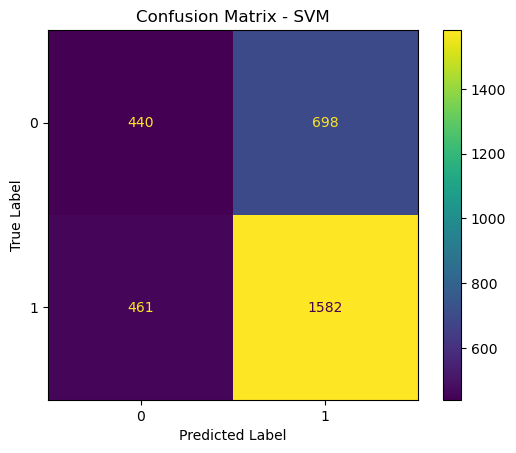

In [135]:
# Calculate confusion matrix
conf_matrix_svm5 = confusion_matrix(y_test, y_pred_svm5)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm5)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

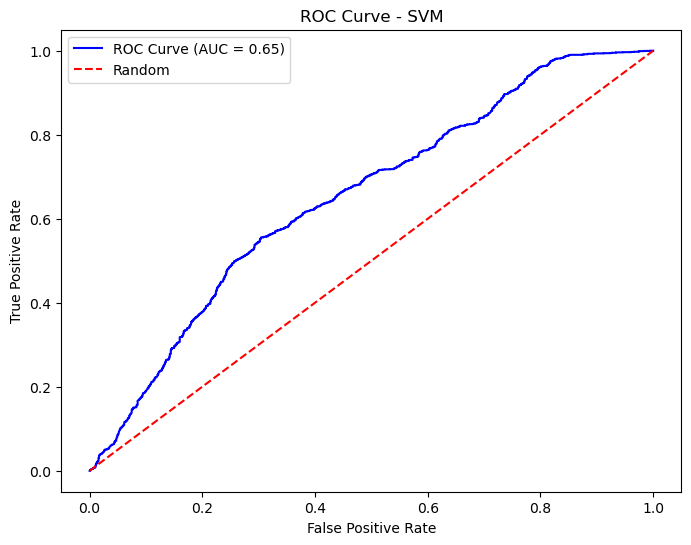

In [136]:
# Calculate ROC AUC
# Note: SVM does not have predict_proba method, so we'll use decision_function instead
y_score_svm = svm_model.decision_function(X_test_k_best)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
auc_svm = roc_auc_score(y_test, y_score_svm)

# Plot ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label=f'ROC Curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

#### 

- The ROC curve in AUC is used to examine how the true positive and false positive rate change together at every threshold
- A AUC larger than 0.5 shows that the model performs better than a random classifier
#####  NB - The more the ROC curve hugs the top left corner of the plot, the better the model does at classifying data

## Model Evaluation

In [137]:
df_inner = pd.merge(df_lr5, df_svm5, on='metric', how='inner')

df_inner = pd.merge(df_inner, df_rf5, on='metric', how='inner')

df_inner

,metric,lr_value,svm_value,rf_value
0,F1 score,0.669099,0.655668,0.961709
1,Recall score,0.797917,0.774387,0.984926
2,Precision score,0.576093,0.568511,0.939560
3,Accuracy score,0.605392,0.593321,0.960784


Overall, The F1-score for class 0 is relatively low, suggesting that the model's ability to balance precision and recall for predicting non-churn cases needs improvement. In the next steps we are going to Perform hyperparameter tuning for all the Models using GridsearchCV Technique.

## Experiment 6

### Using GridsearchCV Technique and SMOTE Technique On SelectKBest TOP 10 Features

### Logistic Regression

In [138]:


# Define the pipeline including preprocessing, feature selection, and model
pipeline_lr = imbpipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('selectkbest', SelectKBest(mutual_info_classif)),    # SelectKBest for feature selection
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE for oversampling
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Parameter grid for GridSearchCV
param_grid_lr = {
    'selectkbest__k': [10],             # Number of top features to select
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],     # Regularization parameter
    'logreg__class_weight': ['balanced', None]  # Class weights
}

# GridSearchCV to find best parameters
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', verbose=0)
grid_search_lr.fit(X_train, y_train)

# Best model from GridSearchCV
best_model_lr = grid_search_lr.best_estimator_

# Predictions on test set
y_pred_lr6 = best_model_lr.predict(X_test)

# Make predictions on the train set
y_pred_train_lr6 = best_model_lr.predict(X_train)
# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr6 = accuracy_score(y_train, y_pred_train_lr6)
print("Logistic Regression Accuracy on the train set with GridSearchCV, SMOTE data and top features:", train_accuracy_lr6)
# Evaluate performance
print("Logistic Regression Performance Metrics:")
print(classification_report(y_test, y_pred_lr6))
print("Accuracy:", accuracy_score(y_test, y_pred_lr6))
print("F1 Score:", f1_score(y_test, y_pred_lr6))
print("Recall Score:", recall_score(y_test, y_pred_lr6))
print("Precision Score:", precision_score(y_test, y_pred_lr6))




Logistic Regression Accuracy on the train set with GridSearchCV, SMOTE data and top features: 0.7428279493830071
Logistic Regression Performance Metrics:
              precision    recall  f1-score   support

           0       0.69      0.49      0.58      1138
           1       0.76      0.88      0.81      2043

    accuracy                           0.74      3181
   macro avg       0.72      0.69      0.69      3181
weighted avg       0.73      0.74      0.73      3181

Accuracy: 0.7403332285444829
F1 Score: 0.8129528985507246
Recall Score: 0.8786098874204601
Precision Score: 0.7564264643910662


<Figure size 640x480 with 0 Axes>

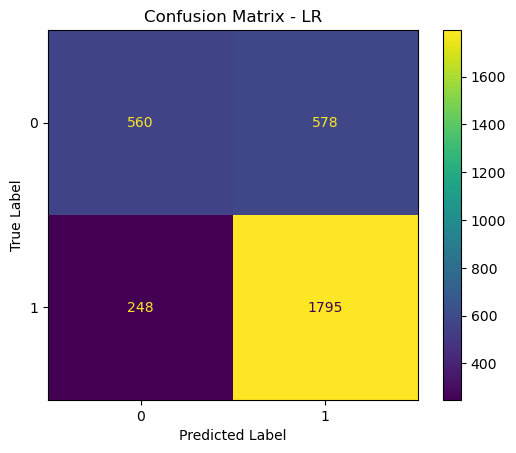

In [139]:
# Confusion Matrix
conf_matrix_lr6 = confusion_matrix(y_test, y_pred_lr6)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr6)
cm_display_lr.plot()
plt.title("Confusion Matrix - LR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

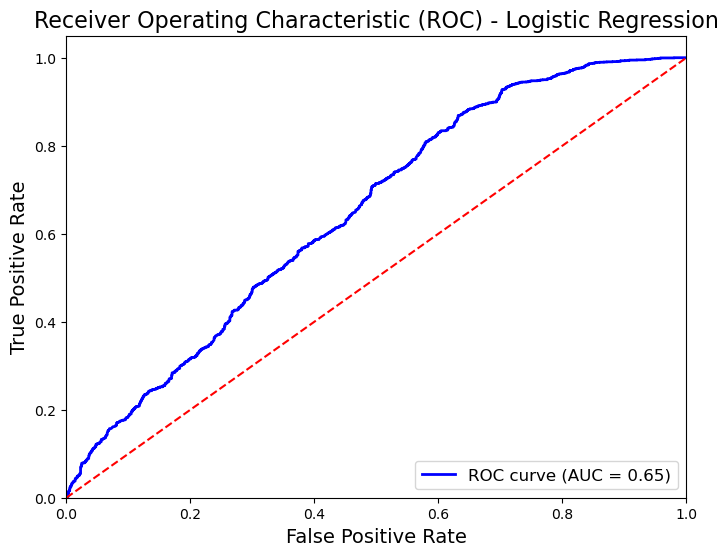

In [140]:
# ROC Curve and AUC
y_prob_lr6 = best_model_lr.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr_lr6, tpr_lr6, thresholds_lr6 = roc_curve(y_test, y_prob_lr6)
auc_lr6 = roc_auc_score(y_test, y_prob_lr6)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### Random Forest

In [141]:
%%time

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline including preprocessing, feature selection, and model
pipeline_rf = imbpipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('selectkbest', SelectKBest(mutual_info_classif)),    # SelectKBest for feature selection
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE for oversampling
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Parameter grid for GridSearchCV
param_grid_rf = {
    'selectkbest__k': [10],             # Number of top features to select
    'rf__n_estimators': [100, 200, 300],        # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'rf__class_weight': ['balanced', 'balanced_subsample', None]  # Class weights
}

# GridSearchCV to find best parameters
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', verbose=0)
grid_search_rf.fit(X_train, y_train)

# Best model from GridSearchCV
best_model_rf = grid_search_rf.best_estimator_

# Predictions on test set
y_pred_rf6 = best_model_rf.predict(X_test)

# Make predictions on the train set
y_pred_train_rf6 = best_model_rf.predict(X_train)
# Compute the accuracy of the train set for SVM model
train_accuracy_rf6 = accuracy_score(y_train, y_pred_train_rf6)
print("Random Forest Accuracy on the train set with GridSearchCV, SMOTE data and top features:", train_accuracy_rf6)
# Evaluate performance
print("Random Forest Performance Metrics:")
print(classification_report(y_test, y_pred_rf6))
print("Accuracy:", accuracy_score(y_test, y_pred_rf6))
print("F1 Score:", f1_score(y_test, y_pred_rf6))
print("Recall Score:", recall_score(y_test, y_pred_rf6))
print("Precision Score:", precision_score(y_test, y_pred_rf6))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf6)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy on the train set with GridSearchCV, SMOTE data and top features: 0.7774895857895151
Random Forest Performance Metrics:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63      1138
           1       0.79      0.82      0.81      2043

    accuracy                           0.75      3181
   macro avg       0.72      0.72      0.72      3181
weighted avg       0.74      0.75      0.74      3181

Accuracy: 0.7456774599182647
F1 Score: 0.8056689887100649
Recall Score: 0.8208516886930984
Precision Score: 0.7910377358490566
Random Forest Confusion Matrix:
[[ 695  443]
 [ 366 1677]]
CPU times: total: 9min 34s
Wall time: 12min 38s


<Figure size 640x480 with 0 Axes>

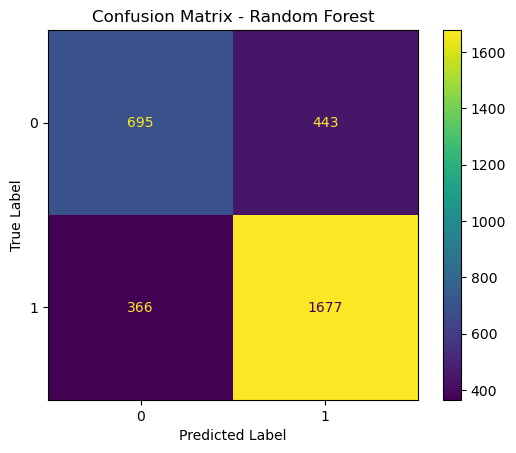

In [142]:
# Calculate confusion matrix
conf_matrix_rf6 = confusion_matrix(y_test, y_pred_rf6)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

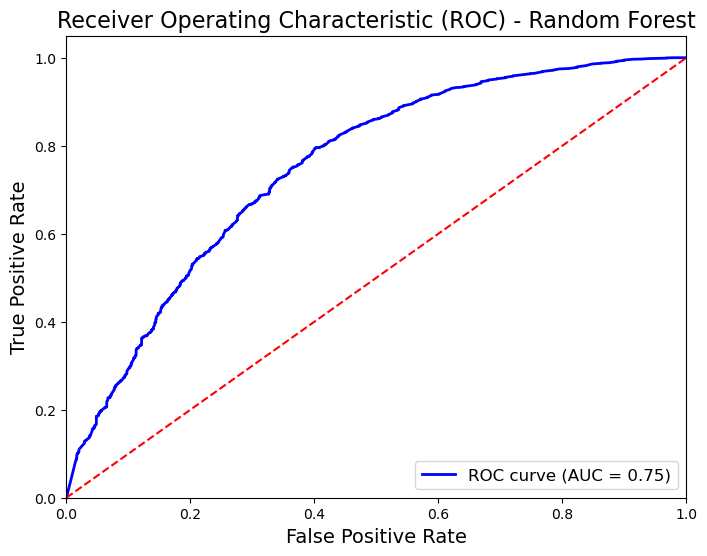

In [143]:
# ROC Curve and AUC
y_prob_rf6 = best_model_rf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf6 = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - Random Forest', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### SVM

In [144]:
%%time

from sklearn.svm import SVC

# Define the pipeline including preprocessing, feature selection, and model
pipeline_svm = imbpipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('selectkbest', SelectKBest(mutual_info_classif)),    # SelectKBest for feature selection
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE for oversampling
    ('svm', SVC(random_state=42))               # SVM model
])

# Parameter grid for GridSearchCV
param_grid_svm = {
    'selectkbest__k': [10],             # Number of top features to select
    'svm__C': [0.1, 1, 10],                     # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],           # Kernel type
    'svm__class_weight': ['balanced', None]     # Class weights
}

# GridSearchCV to find best parameters
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='f1', verbose=0)
grid_search_svm.fit(X_train, y_train)

# Best model from GridSearchCV
best_model_svm = grid_search_svm.best_estimator_

# Predictions on test set
y_pred_svm6 = best_model_svm.predict(X_test)

y_pred_train_svm6 = best_model_svm.predict(X_train)
# Compute the accuracy of the train set for SVM model
train_accuracy_svm6 = accuracy_score(y_train, y_pred_train_svm6)
print("SVM Accuracy on the train set with GridSearchCV, SMOTE data and top features:", train_accuracy_svm6)
# Evaluate performance
print("SVM Performance Metrics:")
print(classification_report(y_test, y_pred_svm6))
print("Accuracy:", accuracy_score(y_test, y_pred_svm6))
print("F1 Score:", f1_score(y_test, y_pred_svm6))
print("Recall Score:", recall_score(y_test, y_pred_svm6))
print("Precision Score:", precision_score(y_test, y_pred_svm6))



SVM Accuracy on the train set with GridSearchCV, SMOTE data and top features: 0.7462076554271792
SVM Performance Metrics:
              precision    recall  f1-score   support

           0       0.76      0.44      0.56      1138
           1       0.75      0.92      0.83      2043

    accuracy                           0.75      3181
   macro avg       0.75      0.68      0.69      3181
weighted avg       0.75      0.75      0.73      3181

Accuracy: 0.7503929581892487
F1 Score: 0.8259535291538799
Recall Score: 0.922173274596182
Precision Score: 0.7479158396188964
CPU times: total: 10min 25s
Wall time: 14min 4s


<Figure size 640x480 with 0 Axes>

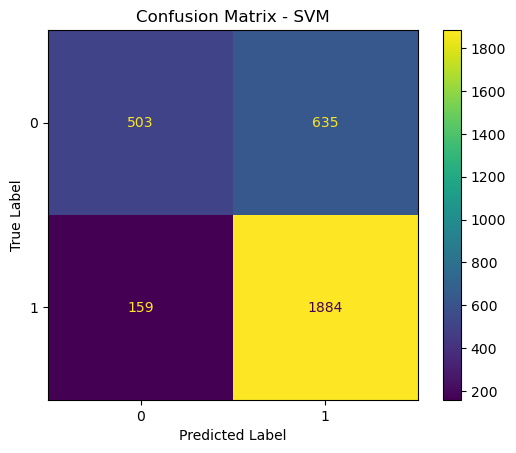

In [145]:
# Calculate confusion matrix
conf_matrix_svm6 = confusion_matrix(y_test, y_pred_svm6)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm6)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


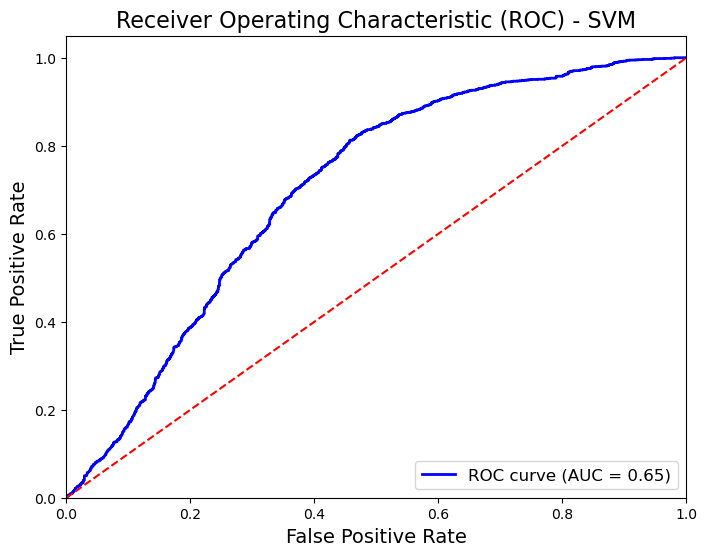

In [146]:
y_prob_svm6 = best_model_svm.decision_function(X_test)  # Decision function values
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm6 = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_svm))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - SVM', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

## Experiment 7

### Using GridsearchCV Technique and SMOTE Technique On SelectKBest TOP 20 Features

### Logistic Regression

In [147]:


# Define the pipeline including preprocessing, feature selection, and model
pipeline_lr = imbpipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('selectkbest', SelectKBest(mutual_info_classif)),    # SelectKBest for feature selection
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE for oversampling
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Parameter grid for GridSearchCV
param_grid_lr = {
    'selectkbest__k': [20],             # Number of top features to select
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],     # Regularization parameter
    'logreg__class_weight': ['balanced', None]  # Class weights
}

# GridSearchCV to find best parameters
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', verbose=0)
grid_search_lr.fit(X_train, y_train)

# Best model from GridSearchCV
best_model_lr = grid_search_lr.best_estimator_

# Predictions on test set
y_pred_lr6 = best_model_lr.predict(X_test)

# Make predictions on the train set
y_pred_train_lr6 = best_model_lr.predict(X_train)
# Compute the accuracy of the train set for Logistic Regression model
train_accuracy_lr6 = accuracy_score(y_train, y_pred_train_lr6)
print("Logistic Regression Accuracy on the train set with GridSearchCV, SMOTE data and top features:", train_accuracy_lr6)
# Evaluate performance
print("Logistic Regression Performance Metrics:")
print(classification_report(y_test, y_pred_lr6))
print("Accuracy:", accuracy_score(y_test, y_pred_lr6))
print("F1 Score:", f1_score(y_test, y_pred_lr6))
print("Recall Score:", recall_score(y_test, y_pred_lr6))
print("Precision Score:", precision_score(y_test, y_pred_lr6))




Logistic Regression Accuracy on the train set with GridSearchCV, SMOTE data and top features: 0.7409416018234694
Logistic Regression Performance Metrics:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58      1138
           1       0.76      0.88      0.81      2043

    accuracy                           0.74      3181
   macro avg       0.73      0.69      0.70      3181
weighted avg       0.73      0.74      0.73      3181

Accuracy: 0.7412763281986796
F1 Score: 0.8133363574506691
Recall Score: 0.8776309348996574
Precision Score: 0.7578191039729502


<Figure size 640x480 with 0 Axes>

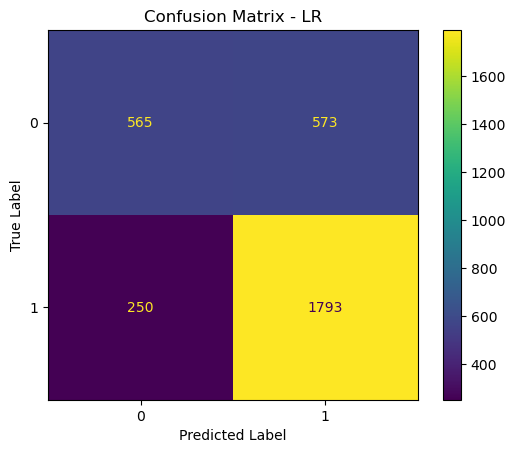

In [148]:
# Confusion Matrix
conf_matrix_lr6 = confusion_matrix(y_test, y_pred_lr6)

# Plot confusion matrix
plt.figure()
cm_display_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr6)
cm_display_lr.plot()
plt.title("Confusion Matrix - LR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

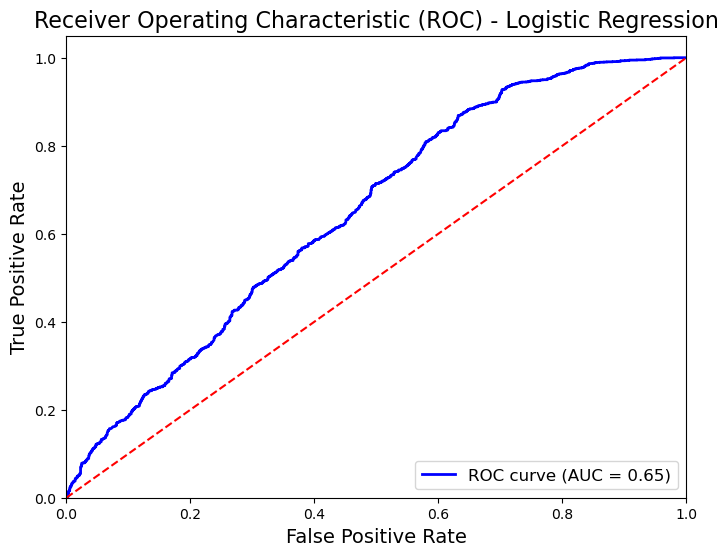

In [149]:
# ROC Curve and AUC
y_prob_lr6 = best_model_lr.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr_lr6, tpr_lr6, thresholds_lr6 = roc_curve(y_test, y_prob_lr6)
auc_lr6 = roc_auc_score(y_test, y_prob_lr6)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_lr))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### Random Forest

In [150]:
%%time


# Define the pipeline including preprocessing, feature selection, and model
pipeline_rf = imbpipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('selectkbest', SelectKBest(mutual_info_classif)),    # SelectKBest for feature selection
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE for oversampling
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Parameter grid for GridSearchCV
param_grid_rf = {
    'selectkbest__k': [20],             # Number of top features to select
    'rf__n_estimators': [100, 200, 300],        # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'rf__class_weight': ['balanced', 'balanced_subsample', None]  # Class weights
}

# GridSearchCV to find best parameters
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', verbose=0)
grid_search_rf.fit(X_train, y_train)

# Best model from GridSearchCV
best_model_rf = grid_search_rf.best_estimator_

# Predictions on test set
y_pred_rf6 = best_model_rf.predict(X_test)

# Make predictions on the train set
y_pred_train_rf6 = best_model_rf.predict(X_train)
# Compute the accuracy of the train set for SVM model
train_accuracy_rf6 = accuracy_score(y_train, y_pred_train_rf6)
print("Random Forest Accuracy on the train set with GridSearchCV, SMOTE data and top features:", train_accuracy_rf6)
# Evaluate performance
print("Random Forest Performance Metrics:")
print(classification_report(y_test, y_pred_rf6))
print("Accuracy:", accuracy_score(y_test, y_pred_rf6))
print("F1 Score:", f1_score(y_test, y_pred_rf6))
print("Recall Score:", recall_score(y_test, y_pred_rf6))
print("Precision Score:", precision_score(y_test, y_pred_rf6))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf6)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy on the train set with GridSearchCV, SMOTE data and top features: 0.7941523225654327
Random Forest Performance Metrics:
              precision    recall  f1-score   support

           0       0.69      0.59      0.64      1138
           1       0.79      0.85      0.82      2043

    accuracy                           0.76      3181
   macro avg       0.74      0.72      0.73      3181
weighted avg       0.75      0.76      0.75      3181

Accuracy: 0.7573090223200252
F1 Score: 0.8181818181818182
Recall Score: 0.8502202643171806
Precision Score: 0.7884702678166137
Random Forest Confusion Matrix:
[[ 672  466]
 [ 306 1737]]
CPU times: total: 10min 40s
Wall time: 15min 35s


<Figure size 640x480 with 0 Axes>

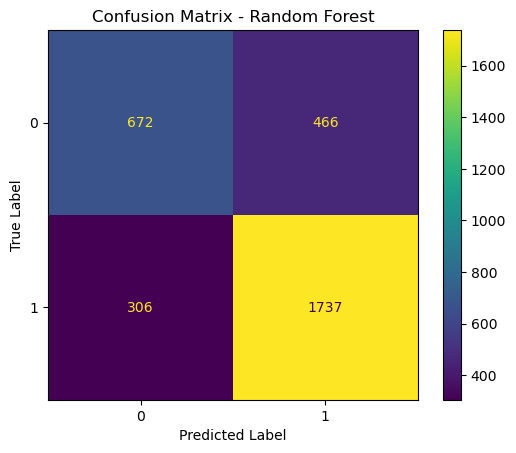

In [151]:
# Calculate confusion matrix
conf_matrix_rf6 = confusion_matrix(y_test, y_pred_rf6)

# Plot confusion matrix
plt.figure()
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest.classes_)
cm_display_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

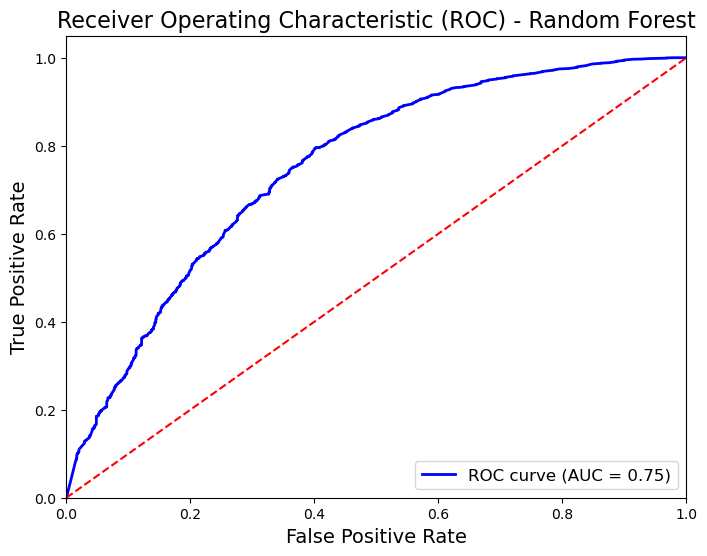

In [152]:
# ROC Curve and AUC
y_prob_rf6 = best_model_rf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf6 = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - Random Forest', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

### SVM

In [153]:
%%time


# Define the pipeline including preprocessing, feature selection, and model
pipeline_svm = imbpipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('selectkbest', SelectKBest(mutual_info_classif)),    # SelectKBest for feature selection
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE for oversampling
    ('svm', SVC(random_state=42))               # SVM model
])

# Parameter grid for GridSearchCV
param_grid_svm = {
    'selectkbest__k': [20],             # Number of top features to select
    'svm__C': [0.1, 1, 10],                     # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],           # Kernel type
    'svm__class_weight': ['balanced', None]     # Class weights
}

# GridSearchCV to find best parameters
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='f1', verbose=0)
grid_search_svm.fit(X_train, y_train)

# Best model from GridSearchCV
best_model_svm = grid_search_svm.best_estimator_

# Predictions on test set
y_pred_svm6 = best_model_svm.predict(X_test)

y_pred_train_svm6 = best_model_svm.predict(X_train)
# Compute the accuracy of the train set for SVM model
train_accuracy_svm6 = accuracy_score(y_train, y_pred_train_svm6)
print("SVM Accuracy on the train set with GridSearchCV, SMOTE data and top features:", train_accuracy_svm6)
# Evaluate performance
print("SVM Performance Metrics:")
print(classification_report(y_test, y_pred_svm6))
print("Accuracy:", accuracy_score(y_test, y_pred_svm6))
print("F1 Score:", f1_score(y_test, y_pred_svm6))
print("Recall Score:", recall_score(y_test, y_pred_svm6))
print("Precision Score:", precision_score(y_test, y_pred_svm6))


SVM Accuracy on the train set with GridSearchCV, SMOTE data and top features: 0.7475438182818518
SVM Performance Metrics:
              precision    recall  f1-score   support

           0       0.77      0.44      0.56      1138
           1       0.75      0.92      0.83      2043

    accuracy                           0.75      3181
   macro avg       0.76      0.68      0.69      3181
weighted avg       0.76      0.75      0.73      3181

Accuracy: 0.7525935240490412
F1 Score: 0.8276013143483023
Recall Score: 0.924620655898189
Precision Score: 0.7490087232355274
SVM Confusion Matrix (Normalized Data):


NameError: name 'conf_matrix_svm' is not defined

<Figure size 640x480 with 0 Axes>

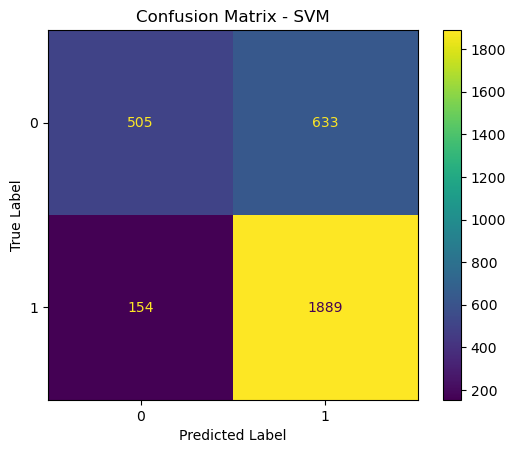

In [154]:
# Calculate confusion matrix
conf_matrix_svm6 = confusion_matrix(y_test, y_pred_svm6)

# Plot confusion matrix
plt.figure()
cm_display_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm6)
cm_display_svm.plot()
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


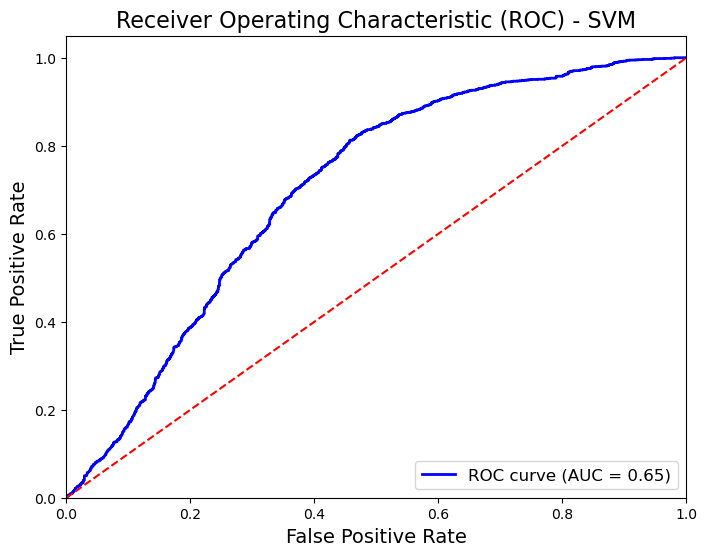

In [155]:
y_prob_svm6 = best_model_svm.decision_function(X_test)  # Decision function values
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm6 = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_svm))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) - SVM', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()

## The most accurate model base on their F1 score is the random forest model
- The Logistic regression is the most inaccurate model withlesser AUC than the others
- THe SVM model has a better performance than the logistic regression but it is very slow to execute some models took more than 30 mins to execute
- The random forest model takes lesser time to run and has a better output when predicting the number of customers that churn and those that a likely to retain

## Model Deployment

- We will deploy the best model on the test dataset

In [156]:
# Define the pipeline including preprocessing, feature selection, and model
pipeline_rf = imbpipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('selectkbest', SelectKBest(mutual_info_classif)),    # SelectKBest for feature selection
    ('smote', SMOTE(random_state=42)),          # Apply SMOTE for oversampling
    ('rf', RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, class_weight='balanced'))  # Example parameters
])

# Fit the pipeline on the entire training data (assuming X_train, y_train are your training features and labels)
pipeline_rf.fit(X_train, y_train)

# Predictions on test set
y_pred_rf6 = pipeline_rf.predict(X_test)

# Evaluate performance on test set
print("Random Forest Performance Metrics on Test Set:")
print(classification_report(y_test, y_pred_rf6))
print("Accuracy:", accuracy_score(y_test, y_pred_rf6))
print("F1 Score:", f1_score(y_test, y_pred_rf6))
print("Recall Score:", recall_score(y_test, y_pred_rf6))
print("Precision Score:", precision_score(y_test, y_pred_rf6))

# # Save the trained model if needed
# import joblib
# joblib.dump(pipeline_rf, 'random_forest_model.pkl')


Random Forest Performance Metrics on Test Set:
              precision    recall  f1-score   support

           0       0.66      0.56      0.60      1138
           1       0.77      0.84      0.80      2043

    accuracy                           0.74      3181
   macro avg       0.71      0.70      0.70      3181
weighted avg       0.73      0.74      0.73      3181

Accuracy: 0.7371895630304935
F1 Score: 0.8036636918741193
Recall Score: 0.837493881546745
Precision Score: 0.7724604966139955


### The Random Forest model was trained and deployed on the test data, showing robust performance with an F1-score of 0.80. While the model's metrics on the test set were slightly lower compared to the training set, it still demonstrated effective generalization. while there was a slight decrease in performance metrics from the training set to the test set, the model's F1-score of 0.80 on the test data reflects a solid performance and suggests its effectiveness in real-world applications.